# Ïã†Ïö©Ïπ¥Îìú ÏÇ¨Ïö©Ïûê Ïó∞Ï≤¥ ÏòàÏ∏° AI Í≤ΩÏßÑÎåÄÌöå
###### https://dacon.io/competitions/official/235713/overview/description

![nn](https://blog.kakaocdn.net/dn/bGTk4O/btq2hCRcXWS/xqJrY5x2FxEJ4lFId0ZFak/img.png)

# ÏµúÏ¢Ö Í≤∞Í≥º : public 19Îì±, private 1Îì±
###### Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO(Ïù¥ÏÉÅÏπò 1ÌñâÏÇ≠Ï†ú ÎØ∏Ïã§Ïãú), Íµ¨Í∞ÑÌôîX, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[VIF]6, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold)

# <span style="color:red">‚≠êÔ∏èÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞ + Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ‚≠êÔ∏è</span> 

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Î™®Îì† Ïó¥ÏùÑ Ï∂úÎ†•ÌïúÎã§.

# Í∏∞Î≥∏ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns 
from matplotlib import rc

# Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏Î°ú ÏÑ§Ï†ï
rc("font", family="AppleGothic")  # Îß•Ïùò Í≤ΩÏö∞
# rc("font", family="Malgun Gothic")  # ÏúàÎèÑÏö∞Ïùò Í≤ΩÏö∞

# ÏùåÏàò Î∂ÄÌò∏ÍπåÏßÄ Ï†úÎåÄÎ°ú ÌëúÏãúÎêòÎèÑÎ°ù ÏÑ§Ï†ï Ï∂îÍ∞Ä
plt.rcParams['axes.unicode_minus'] = False

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú
import random, warnings
warnings.filterwarnings("ignore")

# plolty ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

# Ïä§ÏºÄÏùºÎßÅ, ÌèâÍ∞ÄÏßÄÌëú .. Îì±
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [2]:
train_df = pd.read_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/train.csv')
test_df = pd.read_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/test.csv')
sample_submission_df = pd.read_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/sample_submission.csv')

In [3]:
print(train_df.shape, test_df.shape, sample_submission_df.shape)

(26457, 20) (10000, 19) (10000, 4)


# <span style="color:orange">‚≠êÔ∏èEDA - ÎπÑÏãúÍ∞ÅÌôî‚≠êÔ∏è</span> 

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_df.describe()

In [ ]:
test_df.describe()

In [ ]:
train_df["index"].value_counts()

In [ ]:
train_df["gender"].value_counts()

In [ ]:
train_df["car"].value_counts()

In [ ]:
train_df["reality"].value_counts()

In [ ]:
train_df["child_num"].value_counts()

In [ ]:
train_df["income_total"].value_counts()

In [ ]:
train_df["income_type"].value_counts()

In [ ]:
train_df["edu_type"].value_counts()

In [ ]:
train_df["family_type"].value_counts()

In [ ]:
train_df["house_type"].value_counts()

In [ ]:
train_df["DAYS_BIRTH"].value_counts()

In [ ]:
train_df["DAYS_EMPLOYED"].value_counts()

In [ ]:
train_df["FLAG_MOBIL"].value_counts()

In [ ]:
train_df["work_phone"].value_counts()

In [ ]:
train_df["phone"].value_counts()

In [ ]:
train_df["email"].value_counts()

In [ ]:
train_df["occyp_type"].value_counts()

In [ ]:
train_df["family_size"].value_counts()

In [ ]:
train_df["begin_month"].value_counts()

In [ ]:
train_df["credit"].value_counts()

In [ ]:
p_train_df = train_df[train_df["DAYS_BIRTH"] > 0]
p_train_df["DAYS_BIRTH"].value_counts()

In [ ]:
p_train_df = train_df[train_df["DAYS_EMPLOYED"] > 0]
p_train_df["DAYS_EMPLOYED"].value_counts()

In [ ]:
p_train_df = train_df[train_df["begin_month"] > 0]
p_train_df["begin_month"].value_counts()

# <span style="color:orange">‚≠êÔ∏èEDA - ÏãúÍ∞ÅÌôî‚≠êÔ∏è</span> 

##### Îã§Ïùå ÏãúÍ∞ÅÌôîÎ∂ÄÌÑ∞Îäî "plotly"Î•º ÌôúÏö©Ìï¥ÏÑú ÏãúÍ∞ÅÌôîÌïòÍ∏∞!!

In [ ]:
# ÏÉàÎ°úÏö¥ ÏãúÍ∞ÅÌôî Í∏∞Î≤ï ÏÇ¨Ïö©Ìï¥Î¥Ñ! Í∑∏ÎÉ• Í≤∞Ï∏°Í∞í ÏûàÎäîÏßÄ ÏóÜÎäîÏßÄÎßå ÌååÏïÖ Ìï† Ïàò ÏûàÏùÑ ÎìØ
# import missingno as msno
# msno.bar(df=train_df.iloc[:, :], color=(0.1, 0.6, 0.8))

In [ ]:
# ÌååÏä§ÌÖîÎ°ú Ïù¥ÏÅòÍ≤å ÏãúÍ∞ÅÌôî
df2 = pd.DataFrame(train_df.gender.value_counts().sort_index(ascending=True))

# ÏãúÍ∞ÅÌôî
plt.style.use("seaborn-pastel")
df2.plot(kind="pie", figsize=(5,5), autopct="%.2f%%", startangle = 90, subplots=True)
plt.title("ÏÑ± ÎπÑÏú®", size=20)
plt.show()

In [ ]:
# plt.pie(train_df['credit'].value_counts(), labels = train_df['credit'].value_counts().index, 
#         autopct="%.2f%%", shadow = True, startangle = 90)

# ÌååÏä§ÌÖîÎ°ú Ïù¥ÏÅòÍ≤å ÏãúÍ∞ÅÌôî
df2 = pd.DataFrame(train_df.credit.value_counts().sort_index(ascending=True))

# ÏãúÍ∞ÅÌôî
plt.style.use("seaborn-pastel")
df2.plot(kind="pie", figsize=(5,5), autopct="%.2f%%", startangle = 90, subplots=True)
plt.title("Ïã†Ïö© Îì±Í∏â Î∂ÑÌè¨(ÎπÑÏú®)", size=20)
plt.show()

In [ ]:
# Ïã†Ïö© Îì±Í∏âÎ≥Ñ Î≤îÏ£ºÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥ ÏãúÍ∞ÅÌôî Ìï®Ïàò ÎßåÎì§Í∏∞! - ÎûòÍ≤Ω Ï†úÏûë

def c_credit_plot(column) :
    
    plt.figure(figsize=(26, 4))

    plt.subplot(1,4,1)
    sns.countplot(x=column, data=train_df, order=train_df[column].value_counts().index)
    plt.title("Ï¥ùÌï©")

    plt.subplot(1,4,2)
    sns.countplot(x=column, data=train_df[train_df["credit"] == 0], order=train_df[column].value_counts().index)
    plt.title("credit 0")

    plt.subplot(1,4,3)
    sns.countplot(x=column, data=train_df[train_df["credit"] == 1], order=train_df[column].value_counts().index)
    plt.title("credit 1")

    plt.subplot(1,4,4)
    sns.countplot(x=column, data=train_df[train_df["credit"] == 2], order=train_df[column].value_counts().index)
    plt.title("credit 2")

    plt.show()

In [ ]:
# Ïã†Ïö© Îì±Í∏âÎ≥Ñ Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥ ÏãúÍ∞ÅÌôî Ìï®Ïàò ÎßåÎì§Í∏∞! - ÎûòÍ≤Ω Ï†úÏûë

def i_credit_plot(column):
    plt.figure(figsize=(26, 4))

    plt.subplot(1, 4, 1)
    sns.boxplot(data=train_df, y=column, width=0.3, color="tab:red")
    plt.title("Ï¥ùÌï©")

    plt.subplot(1, 4, 2)
    sns.boxplot(data=train_df[train_df["credit"] == 0], y=column, width=0.3, color="tab:orange")
    plt.title("credit 0")

    plt.subplot(1, 4, 3)
    sns.boxplot(data=train_df[train_df["credit"] == 1], y=column, width=0.3, color="tab:purple")
    plt.title("credit 1")

    plt.subplot(1, 4, 4)
    sns.boxplot(data=train_df[train_df["credit"] == 2], y=column, width=0.3, color="tab:green")
    plt.title("credit 2")

    plt.show()

In [ ]:
# Î≤îÏ£ºÌòï
train_df_c = "gender", "car", "reality", "income_type", "edu_type", "family_type", "house_type", "occyp_type", "FLAG_MOBIL", "work_phone", "phone", "email", "credit"
# ÏàòÏπòÌòï
train_df_i = "income_total", "child_num", "family_size", "DAYS_BIRTH", "DAYS_EMPLOYED", "begin_month", "index"

# indexÏôÄ credit(Ï¢ÖÏÜç)Îäî Ï†úÏô∏Ìï®.
for column_c in train_df_c:
    if column_c != 'credit':
        c_credit_plot(column_c)
        plt.show()

for column_i in train_df_i:
    if column_i != 'index':
        i_credit_plot(column_i)
        plt.show()

In [ ]:
# ÏßÅÏóÖ Ïú†ÌòïÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏñ¥ÏÑú Ïù¥Í≤ÉÎßå ÏãúÍ∞ÅÌôî Ìï¥Î¥êÏïº Ìï† ÎìØ

# Ïö∞ÏÑ† Í≤∞Ï∏°Í∞íÏùÄ "ÎÇòÎèÑÎ™∞Î£®?"ÏúºÎ°ú Ï≤òÎ¶¨Î∂ÄÌÑ∞ ÌïòÏûê
train_df = train_df.fillna({"occyp_type":"ÎÇòÎèÑÎ™∞Î£®?"})

# ÏãúÍ∞ÅÌôî ÏãúÏûë
plt.figure(figsize=(26, 6))

plt.subplot(1,3,1)
sns.countplot(y="occyp_type", data=train_df[train_df["credit"] == 0], order=train_df["occyp_type"].value_counts().index)
plt.title("credit 0")

plt.subplot(1,3,2)
sns.countplot(y="occyp_type", data=train_df[train_df["credit"] == 1], order=train_df["occyp_type"].value_counts().index)
plt.title("credit 1")

plt.subplot(1,3,3)
sns.countplot(y="occyp_type", data=train_df[train_df["credit"] == 2], order=train_df["occyp_type"].value_counts().index)
plt.title("credit 2")

In [ ]:
# ÎÇ†Ïßú Î≥ÄÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(26, 6))

plt.subplot(1,3,1)
sns.violinplot(train_df['DAYS_BIRTH'])
plt.title("DAYS_BIRTH")
plt.subplot(1,3,2)
sns.violinplot(train_df['DAYS_EMPLOYED'])
plt.title("DAYS_EMPLOYED")
plt.subplot(1,3,3)
sns.violinplot(train_df['begin_month'])
plt.title("begin_month")

In [ ]:
# Í∑∏ÎûòÌîÑÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌï† Ïàò ÏûàÏäµÎãàÎã§.
plt.figure(figsize=(15, 5))

# Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎûè
plt.subplot(1, 3, 1)
sns.scatterplot(data=train_df, x='DAYS_BIRTH', y='income_total')
plt.title('DAYS_BIRTH')

# Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎûè
plt.subplot(1, 3, 2)
sns.scatterplot(data=train_df, x='DAYS_EMPLOYED', y='income_total')
plt.title('DAYS_EMPLOYED')

# ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎûè
plt.subplot(1, 3, 3)
sns.scatterplot(data=train_df, x='begin_month', y='income_total')
plt.title('begin_month')

# ÏÑúÎ∏åÌîåÎûè Í∞ÑÏùò Í∞ÑÍ≤©ÏùÑ Ï°∞Ï†àÌï† Ïàò ÏûàÏäµÎãàÎã§.
plt.tight_layout()

# Í∑∏ÎûòÌîÑÎ•º ÌëúÏãúÌï©ÎãàÎã§.
plt.show()


In [ ]:
# 'DAYS_EMPLOYED'Í∞Ä ÏñëÏàòÏù∏ Í≤ΩÏö∞Î•º 0ÏúºÎ°ú Î∞îÍæ∏Îäî Ï†ÑÏ≤òÎ¶¨
train_df['DAYS_EMPLOYED_new'] = train_df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='DAYS_EMPLOYED_new', y='income_total')
plt.title('DAYS_EMPLOYED')
plt.show()

# Îã§Ïãú ÏÇ≠Ï†ú
train_df.drop(['DAYS_EMPLOYED_new'], axis=1, inplace=True)

# <span style="color:yellow">‚≠êÔ∏èPreprocessing‚≠êÔ∏è</span> 

In [4]:
# ÏùòÎØ∏ÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞ [index, FLAG_MOBIL]
train_df.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test_df.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [5]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ [1Î≤àÏß∏ Î∞©Î≤ï]
train_df.fillna('NaN', inplace=True)
test_df.fillna('NaN', inplace=True)

###########################################################################################

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ [2Î≤àÏß∏ Î∞©Î≤ï - ÎûòÍ≤Ω]
# "occyp_type" Ïó¥Ïùò Í∞íÏóê ÎåÄÌïú ÎπÑÏú® Í≥ÑÏÇ∞

# train_ratios = train_df["occyp_type"].value_counts(normalize=True)
# test_ratios = test_df["occyp_type"].value_counts(normalize=True)

# def fill_missing_occyp_type(df, occyp_type_ratios):
    
#     # Í≤∞Ï∏°Í∞íÏùÑ Ï±ÑÏö∞Îäî Ìï®Ïàò
#     def fill_missing_occyp_type_row(row):
#         if pd.isnull(row['occyp_type']):
#             return occyp_type_ratios.sample(1, weights=occyp_type_ratios).index[0]
#         else:
#             return row['occyp_type']

#     # 'occyp_type' Ïó¥Ïóê Ï†ÅÏö©
#     df['occyp_type'] = df.apply(fill_missing_occyp_type_row, axis=1)
    
#     return df

# # train_dfÏóê Ï†ÅÏö©
# train_df = fill_missing_occyp_type(train_df, train_ratios)
# # test_dfÏóê Ï†ÅÏö©
# test_df = fill_missing_occyp_type(test_df, test_ratios)

###########################################################################################

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ [3Î≤àÏß∏ Î∞©Î≤ï - Ïó∞Ïö∞]
# "occyp_type"Ïóê "No job"Ïù¥ÎùºÎäî ÏÜçÏÑ±(ÌîºÏ≤ò) ÏÉùÏÑ±Ìïú ÌõÑ ÏùºÏùÑ ÌïòÏßÄ ÏïäÎäî Ïó∞Í∏à ÏàòÍ∏âÏûêÏùò Í≤ΩÏö∞ No jobÏóê ÎÑ£Ïùå
# Í∑∏Î¶¨Í≥† ÎÇ®ÏùÄ Í∞íÎì§ÏùÑ ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉÎ≤ï(KNN)ÏùÑ ÌÜµÌï¥ ÏßëÏñ¥ ÎÑ£Ïùå.

# from fancyimpute import KNN
# from sklearn.preprocessing import OrdinalEncoder

# # 'income_type'Ïù¥ 'Pensioner'Ïù¥Í≥† 'DAYS_EMPLOYED'Í∞Ä 0 Ïù¥ÏÉÅÏù∏ ÌñâÏóê ÎåÄÌï¥ 'occyp_type'ÏùÑ "No job"ÏúºÎ°ú ÏÑ§Ï†ï
# train_df.loc[(train_df['income_type']=='Pensioner')&(train_df['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"
# test_df.loc[(test_df['income_type']=='Pensioner')&(test_df['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"

# # OrdinalEncoder Î∞è KNN imputerÎ•º Ï¥àÍ∏∞Ìôî
# encoder = OrdinalEncoder()
# imputer = KNN()

# # Ïù∏ÏΩîÎî©Ìï† Î≤îÏ£ºÌòï Ïó¥ÏùÑ ÏßÄÏ†ï [Í≤∞Ï∏°Í∞íÏùÑ Í∞ÄÏû• Ïûò ÏÑ§Î™ÖÌï† Ïàò ÏûàÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎùºÍ≥† ÏÉùÍ∞Å]
# cat_cols = ['occyp_type','edu_type', 'income_type']

# # Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏΩîÎî©ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùò
# def encode(data):
#     # ÎàÑÎùΩÎêú Í∞íÏùÑ Ï†úÏô∏ÌïòÍ≥† Ïú†ÏßÄ
#     nonulls = np.array(data.dropna())
#     # Ïù∏ÏΩîÎî©ÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú Íµ¨ÏÑ±
#     impute_reshape = nonulls.reshape(-1,1)
#     # OrdinalEncoderÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏΩîÎî©
#     impute_ordinal = encoder.fit_transform(impute_reshape)
#     # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎàÑÎùΩÎêú Í∞íÏóê Îã§Ïãú Ïù∏ÏΩîÎî©Îêú Í∞íÏùÑ Ìï†Îãπ
#     data.loc[data.notnull()] = np.squeeze(impute_ordinal)

#     return data

# # ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Î≤îÏ£ºÌòï Ïó¥Ïóê Ïù∏ÏΩîÎî©ÏùÑ Ï†ÅÏö©
# for columns in cat_cols:
#     train_df[columns] = encode(train_df[columns])
#     test_df[columns] = encode(test_df[columns])

# # ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ†ÌÉùÎêú Ïó¥Ïóê ÎåÄÌï¥ ÎàÑÎùΩÎêú Í∞íÏùÑ Ï±ÑÏö∞Í∏∞ ÏúÑÌï¥ KNN imputationÏùÑ Ï†ÅÏö©
# impute_train = train_df[['edu_type','income_type','income_total','occyp_type']]
# impute_test = test_df[['edu_type','income_type','income_total','occyp_type']]

# # KNN imputationÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÑ†ÌÉùÎêú Ïó¥Ïùò ÎàÑÎùΩÎêú Í∞íÏùÑ Ï±ÑÏõÄ
# encode_train_data = pd.DataFrame(np.round(imputer.fit_transform(impute_train)),columns=['edu_type','income_type','income_total','occyp_type'])
# encode_test_data = pd.DataFrame(np.round(imputer.fit_transform(impute_test)),columns=['edu_type','income_type','income_total','occyp_type'])

# # ÏõêÎûò 'occyp_type' Ïó¥ÏùÑ ÎåÄÏ≤¥Îêú Í∞íÏúºÎ°ú ÍµêÏ≤¥
# train_df['occyp_type'] = encode_train_data['occyp_type']
# test_df['occyp_type'] = encode_test_data['occyp_type']

###########################################################################################

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ [4Î≤àÏß∏ Î∞©Î≤ï - ÎûòÍ≤Ω]
# KNNImputer Ïù¥ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Îê® 
# 1. fancyimpute Î≥¥Îã§Îäî Ïò§Î•ò/Î¨∏Ï†úÍ∞Ä Ï†ÅÏùå
# 2. ÎòêÌïú Í≥ÑÏÇ∞ ÏÜçÎèÑÎèÑ Ìõ®Ïî¨ Îπ†Î¶Ñ

# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OrdinalEncoder

# # 'income_type'Ïù¥ 'Pensioner'Ïù¥Í≥† 'DAYS_EMPLOYED'Í∞Ä 0 Ïù¥ÏÉÅÏù∏ ÌñâÏóê ÎåÄÌï¥ 'occyp_type'ÏùÑ "No job"ÏúºÎ°ú ÏÑ§Ï†ï
# train_df.loc[(train_df['income_type']=='Pensioner')&(train_df['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"
# test_df.loc[(test_df['income_type']=='Pensioner')&(test_df['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"

# # OrdinalEncoder Î∞è KNN imputerÎ•º Ï¥àÍ∏∞Ìôî
# encoder = OrdinalEncoder()
# imputer = KNNImputer()

# # Î≤îÏ£ºÌòï Ïó¥ÏùÑ Ïù∏ÏΩîÎî©ÌïòÎäî Ìï®Ïàò Ï†ïÏùò
# def encode(data):
#     nonulls = np.array(data.dropna()).reshape(-1, 1)
#     impute_ordinal = encoder.fit_transform(nonulls)
#     data.loc[data.notnull()] = np.squeeze(impute_ordinal)
#     return data

# # ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Î≤îÏ£ºÌòï Ïó¥Ïóê Ïù∏ÏΩîÎî© Ï†ÅÏö©
# cat_cols = ['occyp_type', 'edu_type', 'income_type']
# for column in cat_cols:
#     train_df[column] = encode(train_df[column])
#     test_df[column] = encode(test_df[column])

# # ÏÑ†ÌÉùÎêú Ïó¥Ïóê ÎåÄÌï¥ KNN imputation Ï†ÅÏö©ÌïòÍ≥† Ï†ïÏàòÎ°ú Î∞òÏò¨Î¶º
# impute_cols = ['edu_type', 'income_type', 'income_total', 'occyp_type']
# train_df[impute_cols] = np.round(imputer.fit_transform(train_df[impute_cols]))
# test_df[impute_cols] = np.round(imputer.transform(test_df[impute_cols]))

# 'occyp_type' Ïó¥Ïóê ÎÇ®ÏïÑÏûàÎäî ÎàÑÎùΩÎêú Í∞íÏùò Í∞úÏàò Ï∂úÎ†•
print(train_df['occyp_type'].isnull().sum())
print(test_df['occyp_type'].isnull().sum())

0
0


In [6]:
def process_outliers(df):
    # Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ [trainÏùÄ 6Ìñâ ÏÇ≠Ï†ú, testÎäî ÏÇ≠Ï†ú ÏóÜÏùå.]
    df = df[(df['family_size'] <= 7)]  # Í∞ÄÏ°± ÏàòÍ∞Ä 7 Ï¥àÍ≥ºÏù∏ Í≤ÉÎì§ ÏÇ≠Ï†ú
    df = df[(df['child_num'] <= 5)]  # ÏûêÎÖÄ ÏàòÍ∞Ä 5 Ï¥àÍ≥ºÏù∏ Í≤ÉÎì§ ÏÇ≠Ï†ú
    df = df.reset_index(drop=True)  # ÏÉàÎ°≠Í≤å Ï¥àÍ∏∞Ìôî Î∞∞Ïó¥

    return df

# train_dfÏóê Ï†ÅÏö©
train_df = process_outliers(train_df)

# test_dfÏóê Ï†ÅÏö©
test_df = process_outliers(test_df)

# ÏûêÏãù Ïàò > Í∞ÄÏ°± ÏàòÏù∏ Í≤ΩÏö∞ [train, test Îëò Îã§ 1ÌñâÏî© Ï°¥Ïû¨] [Í∑ºÎç∞, Dacon ÎåÄÌöåÏóêÏÑú test Îç∞Ïù¥ÌÑ∞Îäî ÌñâÏùÑ Ï§ÑÏù¥Î©¥ ÏïàÎê®!!]
# train_df = train_df.drop(train_df[train_df['child_num'] > train_df['family_size']].index)

In [7]:
def transform_outliers(df):
    # Ïù¥ÏÉÅÏπò Î≥ÄÌôò [ÏñëÏàòÎäî 0ÏúºÎ°ú Î∞îÍøî Í≥†Ïö©ÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÎ°ú Î≥ÄÌôò]
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

    # Î≥ÄÏàò Î≥ÄÌôò [ÏùåÏàòÍ∞í -> ÏñëÏàò Î≥ÄÌôò]
    # ÎÇ†Ïßú Î≥ÄÏàò: DAYS_BIRTH, begin_month, DAYS_EMPLOYED
    dates = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
    for date in dates:
        df[date] = np.abs(df[date])

    return df

# train_dfÏóê Ï†ÅÏö©
train_df = transform_outliers(train_df)

# test_dfÏóê Ï†ÅÏö©
test_df = transform_outliers(test_df)

In [8]:
# # Íµ¨Í∞ÑÌôî Ìï®Ïàò Ï†úÏûë
# def make_bin(df, variable, n):
    
#     data = df
#     count, bin_dividers = np.histogram(data[variable], bins=n)
#     bin_names=[str(i) for i in range(n)]
#     data['%s_bin' % variable] = pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#     data['%s_bin' % variable] = pd.factorize(data['%s_bin' % variable])[0]
    
#     return data

# # DAYS_BIRTH
# train_df = make_bin(train_df, 'DAYS_BIRTH', n=10)
# test_df = make_bin(test_df, 'DAYS_BIRTH', n=10)

# # begin_month
# train_df = make_bin(train_df, 'begin_month', n=10)
# test_df = make_bin(test_df, 'begin_month', n=10)

# # DAYS_EMPLOYED
# train_df = make_bin(train_df, 'DAYS_EMPLOYED', n=10)
# test_df = make_bin(test_df, 'DAYS_EMPLOYED', n=10)

In [9]:
# ÌååÏÉùÎ≥ÄÏàò [Ìï®ÏàòÌôî]

for df in [train_df, test_df] :
    
    # [1] before_EMPLOYED : Í≥†Ïö©ÎêòÍ∏∞ Ï†ÑÍπåÏßÄÏùò ÏùºÏàò (Í≥†Ïö©ÎπÑÏú®)
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    
    # [2] income_total_befofeEMP_ratio : Ïó∞Í∞Ñ ÏÜåÎìù Ï§ë Í≥†Ïö©ÎêòÍ∏∞ Ï†ÑÍπåÏßÄÏùò ÎπÑÏú®
    df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']

    # [X] before_EMPLOYED_year : Í≥†Ïö©ÎêòÏßÄ Ï†ÑÍπåÏßÄÏùò ÎÖÑ
    # df['before_EMPLOYED_year'] = df['before_EMPLOYED'] // 365

    # [3] before_EMPLOYED_month : Í≥†Ïö©Îêú Î™á Ïõî
    df['before_EMPLOYED_month'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)

    # [4] before_EMPLOYED_week : Í≥†Ïö©Îêú Î™áÏß∏ Ï£º
    df['before_EMPLOYED_week'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)
    
    # [5] Age : ÎÇòÏù¥
    df['Age'] = df['DAYS_BIRTH'] // 365
    
    # [6] DAYS_BIRTH_month : ÌÉúÏñ¥ÎÇú Ïõî (Ï∂úÏÉùÏó∞ÎèÑÏùò nÏõî)
    df['DAYS_BIRTH_month'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
    
    # [7] DAYS_BIRTH_week : ÌÉúÏñ¥ÎÇú Ï£º (Ï∂úÏÉùÏó∞ÎèÑÏùò nÏ£ºÏ∞®)
    df['DAYS_BIRTH_week'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)

    # [8] EMPLOYED : Í∑ºÏÜçÏó∞Ïàò
    df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
    
    # [9] DAYS_EMPLOYED_month : Í≥†Ïö©Îêú Îã¨ (Í≥†Ïö©Ïó∞ÎèÑÏùò nÏõî)
    df['DAYS_EMPLOYED_month'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)

    # [10] DAYS_EMPLOYED_week : Í≥†Ïö©Îêú Ï£º (Í≥†Ïö©Ïó∞ÎèÑÏùò nÏ£ºÏ∞®)
    df['DAYS_EMPLOYED_week'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    # [11] ability: ÏÜåÎìù/(ÏÇ¥ÏïÑÏò® ÏùºÏàò+ Í∑ºÎ¨¥ÏùºÏàò)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
    
    # [12] income_mean : ÏÜåÎìù / Í∞ÄÏ°± Ïàò (Ïù∏Îãπ ÌèâÍ∑† Î∂ÄÏñëÎπÑ)
    df['income_mean'] = df['income_total'] / df['family_size']

    # [X] : raito_EMPLOYED (Ïù∏ÏÉùÏùò ÏùºÌïú ÎπÑÏú®)
    # df['raito_EMPLOYED'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

    # [X] : begin_year (Ïã†Ïö©Ïπ¥Îìú Î∞úÍ∏â ÎÖÑÎèÑ)
    # df['begin_year'] = df['begin_month'] // 12

    # [13] ID ÏÉùÏÑ± {2Î≤àÏß∏ Î∞©Î≤ï} [train_df['ID'].value_counts()]
    df['ID'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

In [10]:
print(train_df.shape)
print(test_df.shape)

(26451, 31)
(10000, 30)


In [11]:
train_df.head()

gender car reality  child_num  income_total           income_type  \
0      F   N       N          0      202500.0  Commercial associate   
1      F   N       Y          1      247500.0  Commercial associate   
2      M   Y       Y          0      450000.0               Working   
3      F   N       Y          0      202500.0  Commercial associate   
4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email   occyp_type  \
0       13899           4709           0      0      0          NaN   
1       11380           1540           0      0      1     Laborers   
2       19087           4434           0      1      0     Managers   
3       15088           2092           0      1      0  Sales staff   
4       15037           2105           0      0      0     Managers   

   family_size  begin_month  credit  before_EMPLOYED  \
0          2.0          6.0     1.0             9190   
1          3.0          5.0     1.0             9840   
2          2.0         22.0     2.0            14653   
3          2.0         37.0     0.0            12996   
4          2.0         26.0     2.0            12932   

   income_total_befofeEMP_ratio  before_EMPLOYED_month  before_EMPLOYED_week  \
0                     22.034820                    6.0                   0.0   
1                     25.152439                    4.0                   1.0   
2                     30.710435                    8.0                   1.0   
3                     15.581717                    1.0                   0.0   
4                     12.179091                   11.0                   3.0   

   Age  DAYS_BIRTH_month  DAYS_BIRTH_week  EMPLOYED  DAYS_EMPLOYED_month  \
0   38               7.0              1.0        12                  0.0   
1   31               7.0              1.0         4                  3.0   
2   52               0.0              2.0        12                  3.0   
3   41              10.0              3.0         5                  9.0   
4   41               9.0              0.0         5                 10.0   

   DAYS_EMPLOYED_week    ability  income_mean  \
0                 0.0  10.882416     101250.0   
1                 0.0  19.156347      82500.0   
2                 1.0  19.131840     225000.0   
3                 2.0  11.786962     101250.0   
4                 0.0   9.187959      78750.0   

                                                  ID  
0  0_202500.0_13899_4709_0_0_0_2.0_F_N_N_Commerci...  
1  1_247500.0_11380_1540_0_0_1_3.0_F_N_Y_Commerci...  
2  0_450000.0_19087_4434_0_1_0_2.0_M_Y_Y_Working_...  
3  0_202500.0_15088_2092_0_1_0_2.0_F_N_Y_Commerci...  
4  0_157500.0_15037_2105_0_0_0_2.0_F_Y_Y_State se...

In [12]:
test_df.head()

gender car reality  child_num  income_total           income_type  \
0      M   Y       N          0      112500.0             Pensioner   
1      F   N       Y          0      135000.0         State servant   
2      F   N       Y          0       69372.0               Working   
3      M   Y       N          0      112500.0  Commercial associate   
4      F   Y       Y          0      225000.0         State servant   

                        edu_type     family_type         house_type  \
0  Secondary / secondary special  Civil marriage  House / apartment   
1               Higher education         Married  House / apartment   
2  Secondary / secondary special         Married  House / apartment   
3  Secondary / secondary special         Married  House / apartment   
4               Higher education         Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  occyp_type  \
0       21990              0           0      1      0         NaN   
1       18964           8671           0      1      0  Core staff   
2       15887            217           1      1      0    Laborers   
3       19270           2531           1      0      0     Drivers   
4       17822           9385           1      0      0    Managers   

   family_size  begin_month  before_EMPLOYED  income_total_befofeEMP_ratio  \
0          2.0         60.0            21990                      5.115962   
1          2.0         36.0            10293                     13.115710   
2          2.0         40.0            15670                      4.427058   
3          2.0         41.0            16739                      6.720832   
4          2.0          8.0             8437                     26.668247   

   before_EMPLOYED_month  before_EMPLOYED_week  Age  DAYS_BIRTH_month  \
0                    1.0                   1.0   60               1.0   
1                    7.0                   2.0   51               8.0   
2                    6.0                   2.0   43               1.0   
3                    5.0                   3.0   52               6.0   
4                    5.0                   1.0   48               6.0   

   DAYS_BIRTH_week  EMPLOYED  DAYS_EMPLOYED_month  DAYS_EMPLOYED_week  \
0              1.0         0                  0.0                 0.0   
1              1.0        23                  1.0                 2.0   
2              1.0         0                  7.0                 3.0   
3              0.0         6                  0.0                 1.0   
4              2.0        25                  0.0                 0.0   

    ability  income_mean                                                 ID  
0  5.115962      56250.0  0_112500.0_21990_0_0_1_0_2.0_M_Y_N_Pensioner_S...  
1  4.885109      67500.0  0_135000.0_18964_8671_0_1_0_2.0_F_N_Y_State se...  
2  4.307750      34686.0  0_69372.0_15887_217_1_1_0_2.0_F_N_Y_Working_Se...  
3  5.160314      56250.0  0_112500.0_19270_2531_1_0_0_2.0_M_Y_N_Commerci...  
4  8.269931     112500.0  0_225000.0_17822_9385_1_0_0_2.0_F_Y_Y_State se...

# <span style="color:green">‚≠êÔ∏èFeature Engineering‚≠êÔ∏è</span> 

## Ìòï Î≥ÄÌôò [Ïù∏ÏΩîÎî©]

In [13]:
# train_df Î≥ÄÏàòÌòïÏù¥ Ïñ¥ÎñªÍ≤å ÎêòÏñ¥ÏûàÎäîÏßÄ ÌååÏïÖÌïòÍ∏∞
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26451 entries, 0 to 26450
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        26451 non-null  object 
 1   car                           26451 non-null  object 
 2   reality                       26451 non-null  object 
 3   child_num                     26451 non-null  int64  
 4   income_total                  26451 non-null  float64
 5   income_type                   26451 non-null  object 
 6   edu_type                      26451 non-null  object 
 7   family_type                   26451 non-null  object 
 8   house_type                    26451 non-null  object 
 9   DAYS_BIRTH                    26451 non-null  int64  
 10  DAYS_EMPLOYED                 26451 non-null  int64  
 11  work_phone                    26451 non-null  int64  
 12  phone                         26451 non-null  int64  
 13  e

In [14]:
# test_df Î≥ÄÏàòÌòïÏù¥ Ïñ¥ÎñªÍ≤å ÎêòÏñ¥ÏûàÎäîÏßÄ ÌååÏïÖÌïòÍ∏∞
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        10000 non-null  object 
 1   car                           10000 non-null  object 
 2   reality                       10000 non-null  object 
 3   child_num                     10000 non-null  int64  
 4   income_total                  10000 non-null  float64
 5   income_type                   10000 non-null  object 
 6   edu_type                      10000 non-null  object 
 7   family_type                   10000 non-null  object 
 8   house_type                    10000 non-null  object 
 9   DAYS_BIRTH                    10000 non-null  int64  
 10  DAYS_EMPLOYED                 10000 non-null  int64  
 11  work_phone                    10000 non-null  int64  
 12  phone                         10000 non-null  int64  
 13  em

In [15]:
# Numeric, Category Ïª¨Îüº Î∂ÑÎ•ò (train_df)

train_numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index.tolist()
train_numerical_feats.remove('credit') # trainÏóêÎäî "Î™©Ï†ÅÎ≥ÄÏàò"Í∞Ä ÏûàÏúºÎØÄÎ°ú Ï†úÏô∏!
print("Number of Numerical features: ", len(train_numerical_feats))

train_categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(train_categorical_feats))

Number of Numerical features:  21
Number of Categorical features:  9


In [16]:
# Numeric, Category Ïª¨Îüº Î∂ÑÎ•ò (test_df)

test_numerical_feats = test_df.dtypes[test_df.dtypes != "object"].index.tolist()
print("Number of Numerical features: ", len(test_numerical_feats))

test_categorical_feats = test_df.dtypes[test_df.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(test_categorical_feats))

Number of Numerical features:  21
Number of Categorical features:  9


In [17]:
# Í∞ÅÍ∞Å Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ Îî∞Î°ú ÏûÖÎ†•Ìï¥Î≥¥Í∏∞!

## train_numerical_feats
## test_numerical_feats
## train_categorical_feats
## test_categorical_feats

In [18]:
# from sklearn.preprocessing import OrdinalEncoder [Ïù¥ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏïàÏì∏Í±∞ÏûÑ]

# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞ 9Í∞ú [Îî∞Î°ú ÏßÄÏ†ï ÏïàÌï¥ÎèÑ ÎêòÎäîÎç∞, ÌôïÏù∏Ï∞® ÌòπÏãú Î™®Î•¥Îãà Îã§Ïãú ÏßÄÏ†ïÌïòÍ∏∞!]
categorical_feats = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

# OrdinalEncoder Í∞ÄÏ†∏Ïò§Í≥†
encoder = OrdinalEncoder(categorical_feats)

# train Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï†ÅÏö©
train_df[categorical_feats] = encoder.fit_transform(train_df[categorical_feats], train_df['credit'])

# test Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© Ï†ÅÏö©
test_df[categorical_feats] = encoder.transform(test_df[categorical_feats])

In [19]:
# Ìòï Î≥ÄÌôò (Î≤îÏ£ºÌòï Ïó¥ÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò) [Î≤îÏ£ºÌòïÏùÄ intÌòïÏúºÎ°ú Î∞îÍøîÏïºÏßÄ ÏïàÍ∑∏Îüº Ïò§Î•òÏÉùÍπÄ]

# Í∞ÅÍ∞Å Ï†ÅÏö©
train_df[categorical_feats] = train_df[categorical_feats].astype('int64') # Í∑∏ÎÉ• astype(int)Îùº Ìï¥ÎèÑ Îê®.
test_df[categorical_feats] = test_df[categorical_feats].astype('int64')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26451 entries, 0 to 26450
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        26451 non-null  int64  
 1   car                           26451 non-null  int64  
 2   reality                       26451 non-null  int64  
 3   child_num                     26451 non-null  int64  
 4   income_total                  26451 non-null  float64
 5   income_type                   26451 non-null  int64  
 6   edu_type                      26451 non-null  int64  
 7   family_type                   26451 non-null  int64  
 8   house_type                    26451 non-null  int64  
 9   DAYS_BIRTH                    26451 non-null  int64  
 10  DAYS_EMPLOYED                 26451 non-null  int64  
 11  work_phone                    26451 non-null  int64  
 12  phone                         26451 non-null  int64  
 13  e

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        10000 non-null  int64  
 1   car                           10000 non-null  int64  
 2   reality                       10000 non-null  int64  
 3   child_num                     10000 non-null  int64  
 4   income_total                  10000 non-null  float64
 5   income_type                   10000 non-null  int64  
 6   edu_type                      10000 non-null  int64  
 7   family_type                   10000 non-null  int64  
 8   house_type                    10000 non-null  int64  
 9   DAYS_BIRTH                    10000 non-null  int64  
 10  DAYS_EMPLOYED                 10000 non-null  int64  
 11  work_phone                    10000 non-null  int64  
 12  phone                         10000 non-null  int64  
 13  em

## Î≥ÄÏàò ÏÑ†ÌÉù (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï≤òÎ¶¨, ÏÑ±Îä• Ìñ•ÏÉÅ, Ïä§ÌÑ∞Îîî Îì±) [4Í∞ÄÏßÄ]

In [22]:
# Î≥ÄÏàò ÏÑ†ÌÉùÏùÄ Î≥¥ÌÜµ Î™®Îç∏ÎßÅÍπåÏßÄ ÎßàÎ¨¥Î¶¨ ÌõÑ ÏÑ±Îä• Ìñ•ÏÉÅ ÌòπÏùÄ Í≥µÎ™®Ï†ÑÍ≥º Í∞ôÏùÄ ÎåÄÌöåÏóêÏÑú Î≥ÄÏàòÏóê ÎåÄÌïú Ï§ëÏöîÎèÑ Î∞è ÏÑ§Î™ÖÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©Ìï®.
# Ï¶â, Ïä§ÌÑ∞Îîî Î™©Ï†ÅÏúºÎ°ú ÏßÑÌñâÌï† Í≤ÉÏù¥Í∏∞Ïóê Îî∞Î°ú Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï¥ÎÜìÏûê
# Ï†ÅÏö©Ìï† ÎïåÎäî Îã§Ïãú Í±∞Íæ∏Î°ú ÎÑ£Ïñ¥Ï£ºÎ©¥ Îê®!!!
train = train_df
test = test_df

### <span style="color:orange">[1] ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôúÏö©</span> 

In [ ]:
# Î™©Ï†ÅÎ≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
train.corr()['credit'].sort_values(ascending=False)
# Îî±Ìûà ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏïÑÎ≥¥Ïù¥Îäî Í≤ÉÏùÄ ÏóÜÏùå.

In [ ]:
# Í∑∏Î†áÎã§Î©¥ ÌååÏÉùÎ≥ÄÏàòÏôÄ Í∏∞Ï°¥ Î≥ÄÏàòÍ∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî Ïñ¥Îñ†Ìï†Íπå? [Í∏∞Ï°¥Î≥ÄÏàò ÌòπÏùÄ ÌååÏÉùÎ≥ÄÏàò ÏÇ≠Ï†ú ÌåêÎã®ÏùÑ ÏúÑÌï¥ÏÑú!]
# ÌïòÏßÄÎßå, (ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÎÅºÎ¶¨ ÏòÅÌñ•Ïù¥ ÌÅ∞Í≤å ÏûàÏùå) Í∏∞Ï°¥ Î≥ÄÏàòÎÅºÎ¶¨Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê Î¨∏Ï†úÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏúºÎãà Îã§ Î≥¥Í∏∞Î°ú Ìï® [ÏàòÏ†ï]

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàò Î™©Î°ù [18Í∞ú]
basic_variables = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type', 'edu_type',
                   'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone',
                   'email', 'occyp_type', 'family_size', 'begin_month', 'credit']

# ÏÉàÎ°≠Í≤å ÎßåÎì† Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàò Î™©Î°ù [18Í∞ú] -> [13Í∞ú] {ability Ï∂îÍ∞ÄÌï®}
new_variables = ['before_EMPLOYED', 'income_total_befofeEMP_ratio',
                 'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age', 'DAYS_BIRTH_month',
                 'DAYS_BIRTH_week', 'EMPLOYED', 'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week',
                 'income_mean', 'ability', 'ID']
# 'before_EMPLOYED_year', 'DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin', 'raito_EMPLOYED', 'begin_year'

# Í∏∞Ï°¥ Î≥ÄÏàòÏôÄ ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ•º Ìï©Ïπú Î™®Îì† Î≥ÄÏàò Î™©Î°ù
all_variables = basic_variables + new_variables

# Î™®Îì† Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
# correlation_matrix = train[all_variables].corr()
# [ÏÉàÎ°úÏö¥ Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå ÌôïÏù∏] correlation_with_new_variables = correlation_matrix[new_variables]
correlation_matrix_all = train.corr()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.7 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå Ï∂úÎ†•
high_correlation_all = {}

for column in correlation_matrix_all.columns:
    high_correlation = correlation_matrix_all[column][(correlation_matrix_all[column] >= 0.9) & (correlation_matrix_all[column].index != column)]
    if not high_correlation.empty:
        high_correlation_all[column] = high_correlation

# Ï∂úÎ†•
for column, high_correlation in high_correlation_all.items():
    print(f'\nHigh Correlation with {column}:\n{high_correlation}\n')

In [ ]:
# Í∑∏Î¶ºÏúºÎ°ú ÌååÏïÖÌïòÍ∏∞ÏóêÎäî ÎÑàÎ¨¥ ÎßéÏïÑÏÑú ÎπÑÏãúÍ∞ÅÌôîÎ°ú ÌååÏïÖÌïòÍ∏∞Î°ú Ìï¥Î¥Ñ. [ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÏÑúÎäî ÏãúÍ∞ÅÌôîÎ°ú Î≥º ÏòàÏ†ï]
# Î≥¥ÌÜµ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.7 Ïù¥ÏÉÅÏù∏ Í≤ÉÏùÑ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏúºÎ°ú ÏùòÏã¨Ìï®. Ïñ¥Îñ§ Í≥≥ÏùÄ 0.9 Ïù¥ÏÉÅÏù∏ Í≤ÉÎßåÏùÑ ÌåêÎã®ÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏùå. [ÎÑàÎ¨¥ ÎßéÏïÑÏÑú Ïö∞Î¶¨Îäî 0.9 Ïù¥ÏÉÅÏúºÎ°úÎßå Î≥¥Í∏∞Î°ú Ìï®.]
# 'Age', 'EMPLOYED', 'DAYS_BIRTH', 'DAYS_EMPLOYED' Ï¥ù 4Í∞úÏùò Î≥ÄÏàòÍ∞Ä Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Î≥¥Ïù¥Îäî Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê®.

In [ ]:
# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_variables = ['Age', 'EMPLOYED', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_variables, axis=1)

In [ ]:
train.shape

In [ ]:
# ÏµúÏ¢Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî [train_df]
import seaborn as sns
import matplotlib.pyplot as plt

# train_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
correlation_matrix = train.corr()

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### <span style="color:orange">[2] Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï≤òÎ¶¨ [VIF ÌôúÏö©]</span>

In [23]:
# Î∂ÑÏÇ∞ÌåΩÏ∞ΩÍ≥ÑÏàò(VIF) ÌôïÏù∏Ìï¥Î≥¥Í∏∞!

# VIFÍ∞Ä 10Î≥¥Îã§ ÌÅ∞ Î≥ÄÏàòÎäî Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ Ï°¥Ïû¨Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏúºÎ©∞, Ìï¥Îãπ Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌïòÍ±∞ÎÇò Ï†úÍ±∞ÌïòÏó¨ Î™®Îç∏ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÏùå
# infÎ∂ÄÌÑ∞ ÌïòÎÇòÏî© ÏÇ≠Ï†ú -> Í∞ÄÏû• ÌÅ∞ Í∞í ÏàúÏúºÎ°ú ÌïòÎÇòÏî© ÏÇ≠Ï†ú (Î¨¥Ï°∞Í±¥ÏùÄ ÏïÑÎãò. ÎÇ¥ ÏÉùÍ∞ÅÏóê Ï§ëÏöîÌïòÎã§ Ïã∂ÏúºÎ©¥ ÏÇ≠Ï†ú ÏïàÌï¥ÎèÑ Îê®)
# infÍ∞Ä Î∞úÏÉùÌïú Ïù¥Ïú†Îäî "Î≥ÄÏàò Ï§ëÏóê 0ÏùÑ Ìè¨Ìï®Ìïú Î≥ÄÏàòÍ∞Ä ÏûàÎäîÎç∞ VIF(ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïãù) Í≥ÑÏÇ∞Ïãú Î∂ÑÎ™®Ïóê 0Ïù¥ Îì§Ïñ¥Í∞à Í≤ΩÏö∞" ÎïåÎ¨∏ÏûÑ.
# ÏÉÅÏàòÌï≠ÏùÄ ÎßàÏßÄÎßâÏóê ÏÇ≠Ï†úÌï†Í±∞ÏûÑ.

# [0Ï∞®] ---
# [1Ï∞®] 'DAYS_BIRTH' Î≥ÄÏàò ÏÇ≠Ï†ú
# [2Ï∞®] 'before_EMPLOYED' Î≥ÄÏàò ÏÇ≠Ï†ú
# [3Ï∞®] 'DAYS_EMPLOYED' Î≥ÄÏàò ÏÇ≠Ï†ú
# [4Ï∞®] 'child_num' Î≥ÄÏàò ÏÇ≠Ï†ú ('family_size'Í∞Ä Îçî Ïª∏ÏßÄÎßå, Îçî Ï§ëÏöîÌï¥ Î≥¥Ïó¨ÏÑú child_numÏùÑ ÏÇ≠Ï†úÌï®.)
# [5Ï∞®] 'ability' Î≥ÄÏàò ÏÇ≠Ï†ú
# [6Ï∞®] 'income_total_befofeEMP_ratio' Î≥ÄÏàò ÏÇ≠Ï†ú ('income_total'Îäî Ï§ëÏöîÌï¥ÏÑú ÏÇ≠Ï†ú ÏïàÌï®)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train['Intercept'] = 1
# ÏÉÅÏàòÌï≠ÏùÑ Ï∂îÍ∞ÄÌï®ÏúºÎ°úÏç® Î™®Îç∏Ïù¥ Ìï≠ÏÉÅ Ï†àÌé∏ÏùÑ Í≥†Î†§ÌïòÍ≤å ÎêòÏñ¥, Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÍ∞Ä ÏÑ†Ìòï Ï¢ÖÏÜçÏù¥ÎçîÎùºÎèÑ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïù¥ Ïò¨Î∞îÎ•¥Í≤å ÌòïÏÑ±ÎêòÏñ¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ ÌèâÍ∞ÄÌï† Ïàò ÏûàÍ≤å Îê®.

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable          VIF
0                         gender     1.244516
1                            car     1.220452
2                        reality     1.070629
3                      child_num    28.939375
4                   income_total    19.730465
5                    income_type     2.128459
6                       edu_type     1.055302
7                    family_type     8.937982
8                     house_type     1.028121
9                     DAYS_BIRTH          inf
10                 DAYS_EMPLOYED          inf
11                    work_phone     1.228470
12                         phone     1.124486
13                         email     1.035726
14                    occyp_type     1.134241
15                   family_size    47.359386
16                   begin_month     1.037880
17                        credit     1.025917
18               before_EMPLOYED          inf
19  income_total_befofeEMP_ratio    14.307963
20         before_EMPLOYED_month  

In [25]:
# 'DAYS_BIRTH' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['DAYS_BIRTH']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable          VIF
0                         gender     1.244516
1                            car     1.220452
2                        reality     1.070629
3                      child_num    28.939375
4                   income_total    19.730465
5                    income_type     2.128459
6                       edu_type     1.055302
7                    family_type     8.937982
8                     house_type     1.028121
9                  DAYS_EMPLOYED  1407.238105
10                    work_phone     1.228470
11                         phone     1.124486
12                         email     1.035726
13                    occyp_type     1.134241
14                   family_size    47.359386
15                   begin_month     1.037880
16                        credit     1.025917
17               before_EMPLOYED  2403.681526
18  income_total_befofeEMP_ratio    14.307963
19         before_EMPLOYED_month     1.036099
20          before_EMPLOYED_week  

In [26]:
# 'before_EMPLOYED' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['before_EMPLOYED']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable         VIF
0                         gender    1.244367
1                            car    1.219887
2                        reality    1.070298
3                      child_num   28.936025
4                   income_total   19.677115
5                    income_type    2.127692
6                       edu_type    1.054551
7                    family_type    8.934519
8                     house_type    1.028041
9                  DAYS_EMPLOYED  824.320153
10                    work_phone    1.228072
11                         phone    1.124434
12                         email    1.035688
13                    occyp_type    1.134025
14                   family_size   47.357087
15                   begin_month    1.037875
16                        credit    1.025863
17  income_total_befofeEMP_ratio   14.302062
18         before_EMPLOYED_month    1.029734
19          before_EMPLOYED_week    1.032701
20                           Age    5.250890
21        

In [27]:
# 'DAYS_EMPLOYED' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['DAYS_EMPLOYED']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable         VIF
0                         gender    1.244264
1                            car    1.219656
2                        reality    1.070150
3                      child_num   28.936025
4                   income_total   19.648832
5                    income_type    2.065766
6                       edu_type    1.054224
7                    family_type    8.934420
8                     house_type    1.027753
9                     work_phone    1.227752
10                         phone    1.124045
11                         email    1.035627
12                    occyp_type    1.130551
13                   family_size   47.357078
14                   begin_month    1.037861
15                        credit    1.025689
16  income_total_befofeEMP_ratio   14.295344
17         before_EMPLOYED_month    1.029567
18          before_EMPLOYED_week    1.032268
19                           Age    5.240043
20              DAYS_BIRTH_month    1.029768
21        

In [28]:
# 'child_num' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©
# family_sizeÍ∞Ä Îçî Ï§ëÏöîÌï†Í±∞ Í∞ôÎã§Îäî ÏÉùÍ∞ÅÏûÑ.

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['child_num']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable         VIF
0                         gender    1.243670
1                            car    1.219305
2                        reality    1.070129
3                   income_total   19.419780
4                    income_type    2.065454
5                       edu_type    1.052575
6                    family_type    2.131473
7                     house_type    1.027708
8                     work_phone    1.226403
9                          phone    1.123604
10                         email    1.034858
11                    occyp_type    1.130140
12                   family_size    2.886276
13                   begin_month    1.037762
14                        credit    1.025637
15  income_total_befofeEMP_ratio   14.289383
16         before_EMPLOYED_month    1.029553
17          before_EMPLOYED_week    1.032268
18                           Age    5.232102
19              DAYS_BIRTH_month    1.029666
20               DAYS_BIRTH_week    1.036290
21        

In [29]:
# 'ability' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['ability']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                        Variable         VIF
0                         gender    1.240241
1                            car    1.219187
2                        reality    1.069963
3                   income_total   13.625450
4                    income_type    2.061686
5                       edu_type    1.052019
6                    family_type    2.130814
7                     house_type    1.027694
8                     work_phone    1.226403
9                          phone    1.123604
10                         email    1.034833
11                    occyp_type    1.130134
12                   family_size    2.866531
13                   begin_month    1.036683
14                        credit    1.025522
15  income_total_befofeEMP_ratio   11.122135
16         before_EMPLOYED_month    1.029276
17          before_EMPLOYED_week    1.032266
18                           Age    4.154805
19              DAYS_BIRTH_month    1.029562
20               DAYS_BIRTH_week    1.035890
21        

In [30]:
# 'income_total_befofeEMP_ratio' Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ Îã§Ïãú Ï†ÅÏö©

# Ï†úÏô∏Ìï† Î≥ÄÏàò Î™©Î°ù
exclude_v = ['income_total_befofeEMP_ratio']

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train.drop(exclude_v, axis=1)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print(vif_data)

                 Variable         VIF
0                  gender    1.237169
1                     car    1.218409
2                 reality    1.069942
3            income_total    4.892519
4             income_type    1.921139
5                edu_type    1.050367
6             family_type    2.116545
7              house_type    1.027633
8              work_phone    1.223709
9                   phone    1.123589
10                  email    1.034728
11             occyp_type    1.126542
12            family_size    2.824987
13            begin_month    1.036654
14                 credit    1.025426
15  before_EMPLOYED_month    1.029159
16   before_EMPLOYED_week    1.032171
17                    Age    1.746361
18       DAYS_BIRTH_month    1.029560
19        DAYS_BIRTH_week    1.035655
20               EMPLOYED    1.152877
21    DAYS_EMPLOYED_month    1.318471
22     DAYS_EMPLOYED_week    1.238215
23            income_mean    7.088723
24                     ID    1.008950
25          

In [31]:
# Î∂àÌïÑÏöîÌïú 'Intercept' ÏÇ≠Ï†ú
train = train.drop('Intercept', axis=1)

In [32]:
# ÏµúÏ¢Ö ÏôÑÏÑ±!
train.shape

(26451, 25)

In [33]:
# [Ï†ÅÏö©Ìï† Í≤ΩÏö∞] trainÏùÄ train_df(ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞)Ïóê ÎÑ£Ïñ¥Ï£ºÍ≥† + testÎäî ÎèôÏùºÌïú Í∞í ÏÇ≠Ï†ú Ìï¥Ï£ºÍ∏∞
train_df = train

ex_data = ['DAYS_BIRTH', 'before_EMPLOYED', 'DAYS_EMPLOYED', 'child_num', 'ability', 'income_total_befofeEMP_ratio']
test_df = test_df.drop(ex_data, axis=1, )

In [34]:
train_df.shape

(26451, 25)

In [35]:
test_df.shape

(10000, 24)

### <span style="color:orange">[3] Î≥ÄÏàòÏÑ†ÌÉù Î∞©Î≤ï [Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï/ÌõÑÏßÑÏÜåÍ±∞Î≤ï/Îã®Í≥ÑÏ†ÅÏÑ†ÌÉùÎ≤ï]</span>

In [ ]:
# Î™®Îç∏ÎßÅ Î∂ÄÎ∂ÑÏóêÏÑú ÏßÑÌñâÌï®. [Î™®Îç∏ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÎ©¥ÏÑú ÏïåÏïÑÏÑú ÏÑ†ÌÉùÌï¥Ï£ºÍ∏∞ ÎïåÎ¨∏.]
# ÏõêÎûòÎäî Ï§ëÏöîÎèÑÎ•º Î≥¥Î©¥ÏÑú ÌïòÎÇòÏî© ÏßÅÏ†ë ÏÇ≠Ï†úÌï¥Í∞ÄÎ©¥ÏÑú ÏÑ±Îä• ÌôïÏù∏ÌïòÎäî Î∞©Î≤ïÏù¥ Ï†úÏùº Ï¢ãÏùÄ Î∞©Î≤ïÏù¥Í∏¥ Ìï®.

In [ ]:
# [ÏÑ† ÏûëÏóÖ] Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†, "ÌöåÍ∑Ä Î™®Îç∏ Ï¥àÍ∏∞Ìôî"

# forward, floating ÏÜçÏÑ±Îßå Ï°∞Ï†àÌïòÎ©¥ Îê®
# [1] Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï : True, False
# [2] ÌõÑÏßÑÏÜåÍ±∞Î≤ï : False, False
# [3] Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï : True, True
sfs_forward = SFS(logistic_model,
                  k_features=(1, len(X_train.columns)),
                  forward=True,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

sfs_forward = sfs_forward.fit(X_train_split, y_train_split)

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ°ú Î™®Îç∏ ÌõàÎ†® + ÌèâÍ∞Ä + test Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö© + Í≤∞Í≥º Ï∂úÎ†• (Î°úÍ∑∏ ÏÜêÏã§ Í∞í Í≥ÑÏÇ∞)
# [Ï†ÅÏö© Í≤∞Í≥º] : 3Î∂ÑÎ•ò ÎåÄÌöåÎã§ Î≥¥Îãà Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ï†ÅÏö©Ìï¥Î¥§ÎäîÎç∞, ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßê. ÌõÑÏßÑÏÜåÍ±∞Î≤ïÏóêÏÑú Í∞ÄÏû• Ï†êÏàòÍ∞Ä Ï¢ãÏïòÏùå.
# ÌïòÏßÄÎßå, Ïö∞Î¶¨Îäî catboost ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îãà PASS, Í∑∏Î¶¨Í≥† ÌõÑÏßÑÏÜåÍ±∞Î≤ïÏùò Í≤ΩÏö∞ ÎÑàÎ¨¥ Ïò§ÎûòÍ±∏Î¶º. Îç∞Ïä§ÌÅ¨ÌÉëÏúºÎ°ú ÎèåÎ¶¨Îäî Í≤ÉÏùÑ Ï∂îÏ≤úÌï®.

### <span style="color:orange">[4] Î≥ÄÏàòÏùò Ïú†ÏùòÏÑ± Í≤ÄÏ†ï</span>

In [ ]:
# Î≥ÄÏàòÍ∞Ä 2Í∞ú Ïù¥ÏÉÅÏùº Îïå ÏÇ¨Ïö© -> Î≥ÄÏàò Í∞ÑÏùò ÎèÖÎ¶ΩÏÑ±/Í¥ÄÎ†®ÏÑ± Í≤ÄÏ†ï
# H0(Í∑ÄÎ¨¥Í∞ÄÏÑ§)ÏùÄ "Îëê Î≥ÄÏàòÏùò Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎã§. Ï¶â ÎèÖÎ¶ΩÏù¥Îã§."
# H1(ÎåÄÎ¶ΩÍ∞ÄÏÑ§)ÏùÄ "Ïó∞Í¥ÄÏÑ±Ïù¥ Ï°¥Ïû¨ÌïúÎã§. Ï¶â, ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§."
# p-value<0.05 : Ïã†Î¢∞ÏàòÏ§Ä ÌïòÏóêÏÑú Ïú†ÏùòÌïú Í¥ÄÍ≥ÑÎ°ú, ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
# p-value>0.05 : Ïã†Î¢∞ÏàòÏ§Ä ÌïòÏóêÏÑú Î¨¥ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

# 1. Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï - ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
# -> Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÄ Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä ÎèÖÎ¶ΩÏ†ÅÏù∏ÏßÄ Ïó¨Î∂ÄÎ•º Í≤ÄÏ†ïÌïòÎäî ÌÜµÍ≥ÑÏ†Å Î∞©Î≤ï Ï§ë ÌïòÎÇò

# 2. Îã§Ï§ë Î°úÏßÄÏä§Ìã± Í≤ÄÏ†ï [Í∑∏Îü¨ÎØÄÎ°ú Ïù¥Í±¥ Î∞ëÏóêÏÑú Îî∞Î°ú ÏßÑÌñâ]
# -> ÎÇ¥Í∞Ä ÏïåÍ∏∞Î°† Î∞ëÏóêÏÑú ÌöåÍ∑ÄÎ∂ÑÏÑùÌï†Îïå Í∞ôÏù¥ ÌÜµÍ≥ÑÌëú Î≥¥Î©¥ÏÑú pÍ∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÎÉê ÏïàÏûëÎÉê Î≥¥Î©¥ÏÑú ÏÇ≠Ï†úÌïòÎäî Í±∞ Í∞ôÏùå.

In [ ]:
# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï [ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Í∞ÑÏùò Í≤ÄÏ†ï] [Î≥ÄÏàòÏÑ†ÌÉù]

import pandas as pd
from scipy.stats import chi2_contingency

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î∂àÎü¨Ïò§Í∏∞
data = train

# Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÎ•º ÏÑ†ÌÉù
dependent_variable = 'credit'
independent_variables = data.columns.difference([dependent_variable])

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±
chi_square_results = pd.DataFrame(columns=['Variable', 'Chi2', 'P-value', 'Conclusion'])

# Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏóê ÎåÄÌï¥ Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÑ ÏàòÌñâ
for variable in independent_variables:
    contingency_table = pd.crosstab(data[dependent_variable], data[variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
    conclusion = "Reject H0" if p < 0.05 else "Fail to reject H0"
    chi_square_results = chi_square_results.append({
        'Variable': variable,
        'Chi2': chi2,
        'P-value': p,
        'Conclusion': conclusion
    }, ignore_index=True)

# Í≤∞Í≥ºÎ•º Ï∂úÎ†•
chi_square_results

### <span style="color:orange">[*] train, test Î≥ÄÏàòÏÑ†ÌÉù Ï†ÅÏö© [Î≥ÄÏàò 3Í∞ú ÏÇ≠Ï†ú]</span>

In [ ]:
# trainÏóêÏÑú ÏÇ≠Ï†úÌïú Î≥ÄÏàò Í∑∏ÎåÄÎ°ú test_dfÏóêÏÑúÎèÑ ÏÇ≠Ï†ú!
exclude_test_v = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

train_df = train_df.drop(exclude_test_v, axis=1)
test_df = test_df.drop(exclude_test_v, axis=1)

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
# ÏµúÏ¢Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî [train_df]
import seaborn as sns
import matplotlib.pyplot as plt

# train_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
correlation_matrix = train_df.corr()

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# ÏµúÏ¢Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî [test_df]
import seaborn as sns
import matplotlib.pyplot as plt

# train_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
correlation_matrix = test_df.corr()

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Î°úÍ∑∏Î≥ÄÌôò (ÏôúÎèÑ ÌååÏïÖ)

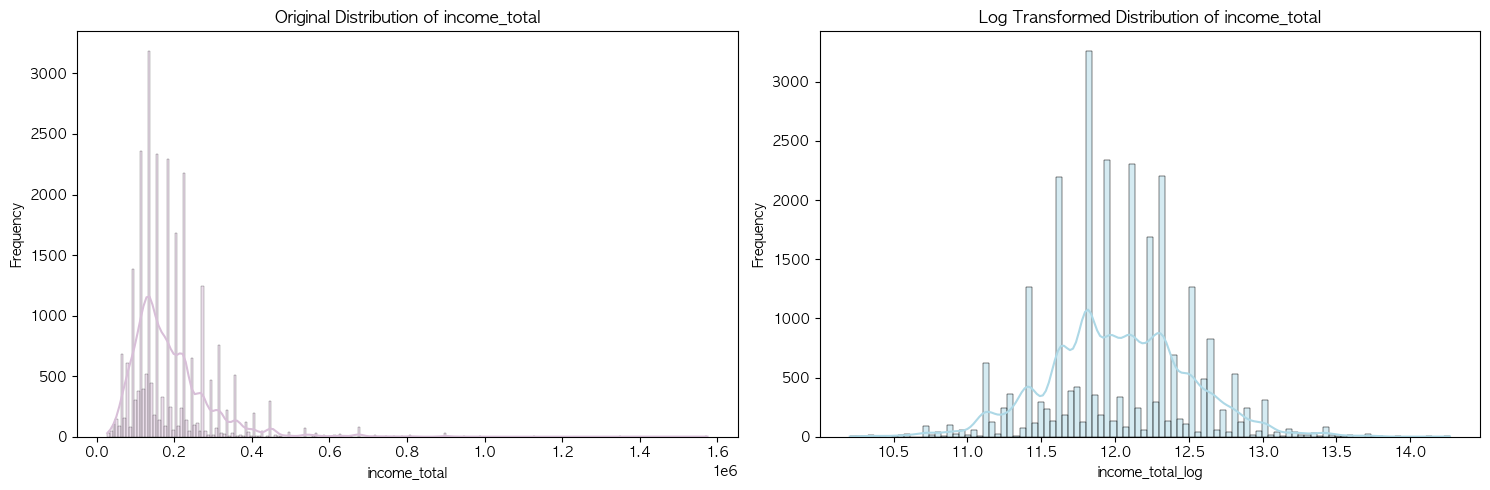

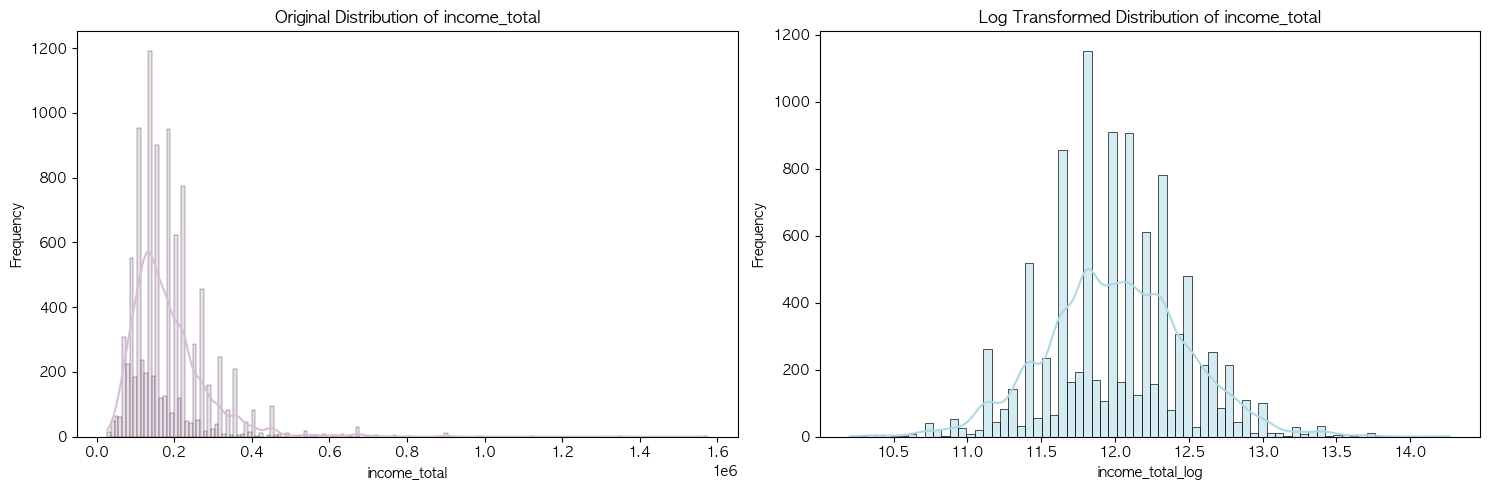

In [36]:
def log_transform_column(df, column):
    
    # Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
    new_column_name = f'{column}_log'
    df[new_column_name] = np.log1p(1+df[column])
    
    # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # ÏõêÎûò Î≥ÄÏàòÏóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
    sns.histplot(df[column], kde=True, color='thistle', ax=axes[0])
    axes[0].set_title(f'Original Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Î°úÍ∑∏ Î≥ÄÌôò Î≥ÄÏàòÏóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
    sns.histplot(df[new_column_name], kde=True, color='lightblue', ax=axes[1])
    axes[1].set_title(f'Log Transformed Distribution of {column}')
    axes[1].set_xlabel(new_column_name)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
    return df

# Í∞ÅÍ∞Å Ï†ÅÏö©
train_df = log_transform_column(train_df, 'income_total')
test_df = log_transform_column(test_df, 'income_total')

# Í∏∞Ï°¥ ÏπºÎüº ÏÇ≠Ï†ú
train_df = train_df.drop(['income_total_log'], axis=1)
test_df = test_df.drop(['income_total_log'], axis=1)

## ÌëúÏ§ÄÌôî(StandardScale)

In [37]:
numerical_feats = ['work_phone', 'phone', 'email', 'family_size', 'begin_month', 'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age', 
                   'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED', 'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean']

# 'income_total'Î•º ÏàòÏπòÌòï Î≥ÄÏàò Î™©Î°ùÏóêÏÑú Ï†úÍ±∞ [Ïù¥ÎØ∏ Î°úÍ∑∏Î≥ÄÌôò ÌñàÏúºÎãà Ï†úÏô∏]
# Î≥ÄÏàò ÏÑ†ÌÉùÏóêÏÑú ÏÇ≠Ï†úÎêú 3Í∞ú : 'child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
# Î°úÍ∑∏Î≥ÄÌôòÌïú 'income_total'ÏùÄ Ï†úÏô∏
# Íµ¨Í∞ÑÌôî Î≥ÄÏàò ÎÑ£Í≤å ÎêòÎ©¥ : 'DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin' Ï∂îÍ∞ÄÌïòÎ©¥ Îê®
# Î≥ÄÏàòÏÑ†ÌÉù(vif)Ïùº Í≤ΩÏö∞ ÏÇ≠Ï†úÎêòÎäî Î≥ÄÏàò : 'DAYS_BIRTH', 'before_EMPLOYED', 'DAYS_EMPLOYED', 'child_num', 'ability', 'income_total_befofeEMP_ratio'
                                # Ï¶â, Ï∂îÍ∞ÄÎ°ú 'before_EMPLOYED', 'ability', 'income_total_befofeEMP_ratio' ÏÇ≠Ï†úÌïòÎ©¥ Îê®.

# [ÏõêÎ≥∏] : ÌòπÏãú Î™®Î•¥Îãà Îî∞Î°ú ÎßåÎì§Ïñ¥ÎëêÍ∏∞
# numerical_feats = ['work_phone', 'phone', 'email', 'family_size', 'begin_month', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age', 
#                    'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED', 'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'ability', 'income_mean']


# StandardScaler Í∞ùÏ≤¥Î•º ÏÉùÏÑ± Î∞è Ï¥àÍ∏∞Ìôî!
scaler = StandardScaler()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÏπòÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ scalerÎ•º ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å fittingÌïòÍ≥† Î≥ÄÏàòÎ•º Î≥ÄÌôò
train_df[numerical_feats] = scaler.fit_transform(train_df[numerical_feats])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÏàòÎ•º Î≥ÄÌôòÌï† ÎïåÏóêÎäî fittingÌïú scalerÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌëúÏ§ÄÌôî
test_df[numerical_feats] = scaler.transform(test_df[numerical_feats])

In [38]:
train_df.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0       1    1        1      202500.0            1         1            1   
1       1    1        2      247500.0            1         2            2   
2       2    2        2      450000.0            2         1            1   
3       1    1        2      202500.0            1         2            1   
4       1    2        2      157500.0            3         1            1   

   house_type  work_phone     phone     email  occyp_type  family_size  \
0           1   -0.538321 -0.645632 -0.316977           1    -0.216262   
1           2   -0.538321 -0.645632  3.154805           2     0.897294   
2           2   -0.538321  1.548870 -0.316977           3    -0.216262   
3           2   -0.538321  1.548870 -0.316977           4    -0.216262   
4           2   -0.538321 -0.645632 -0.316977           3    -0.216262   

   begin_month  credit  before_EMPLOYED_month  before_EMPLOYED_week       Age  \
0    -1.215242     1.0               0.166791             -1.348417 -0.452826   
1    -1.275633     1.0              -0.418442             -0.458877 -1.060773   
2    -0.248981     2.0               0.752023             -0.458877  0.763069   
3     0.656889     0.0              -1.296291             -1.348417 -0.192277   
4    -0.007416     2.0               1.629872              1.320202 -0.192277   

   DAYS_BIRTH_month  DAYS_BIRTH_week  EMPLOYED  DAYS_EMPLOYED_month  \
0          0.442795        -0.443485  0.994253            -1.230046   
1          0.442795        -0.443485 -0.250471            -0.424295   
2         -1.582567         0.451504  0.994253            -0.424295   
3          1.310808         1.346494 -0.094880             1.187206   
4          1.021471        -1.338475 -0.094880             1.455790   

   DAYS_EMPLOYED_week  income_mean  ID  
0           -1.077087     0.002062   1  
1           -1.077087    -0.254157   2  
2           -0.223607     1.693108   3  
3            0.629874     0.002062   4  
4           -1.077087    -0.305401   5

In [39]:
test_df.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0       2    2        1      112500.0            4         2            2   
1       1    1        2      135000.0            3         1            1   
2       1    1        2       69372.0            2         2            1   
3       2    2        1      112500.0            1         2            1   
4       1    2        2      225000.0            3         1            1   

   house_type  work_phone     phone     email  occyp_type  family_size  \
0           2   -0.538321  1.548870 -0.316977           1    -0.216262   
1           2   -0.538321  1.548870 -0.316977           6    -0.216262   
2           2    1.857628  1.548870 -0.316977           2    -0.216262   
3           2    1.857628 -0.645632 -0.316977           7    -0.216262   
4           2    1.857628 -0.645632 -0.316977           3    -0.216262   

   begin_month  before_EMPLOYED_month  before_EMPLOYED_week       Age  \
0     2.045889              -1.296291             -0.458877  1.457866   
1     0.596497               0.459407              0.430662  0.676220   
2     0.838063               0.166791              0.430662 -0.018578   
3     0.898454              -0.125826              1.320202  0.763069   
4    -1.094459              -0.125826             -0.458877  0.415671   

   DAYS_BIRTH_month  DAYS_BIRTH_week  EMPLOYED  DAYS_EMPLOYED_month  \
0         -1.293230        -0.443485 -0.872832            -1.230046   
1          0.732133        -0.443485  2.705748            -0.961462   
2         -1.293230        -0.443485 -0.872832             0.650039   
3          0.153458        -1.338475  0.060710            -1.230046   
4          0.153458         0.451504  3.016929            -1.230046   

   DAYS_EMPLOYED_week  income_mean    ID  
0           -1.077087    -0.612864  1402  
1            0.629874    -0.459133   312  
2            1.483355    -0.907537  2737  
3           -0.223607    -0.612864  8084  
4           -1.077087     0.155793  5263

In [40]:
# train Îç∞Ïù¥ÌÑ∞ Ìñâ Î™áÍ∞ú ÏÇ≠Ï†úÌï¥ÏÑú Ïò§Î•òÎÇ®.. index Ï¥àÍ∏∞Ìôî Ìï¥Ï§òÏïº Ìï®.
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

## Íµ∞ÏßëÌôî Î≥ÄÏàò ÏÉùÏÑ±

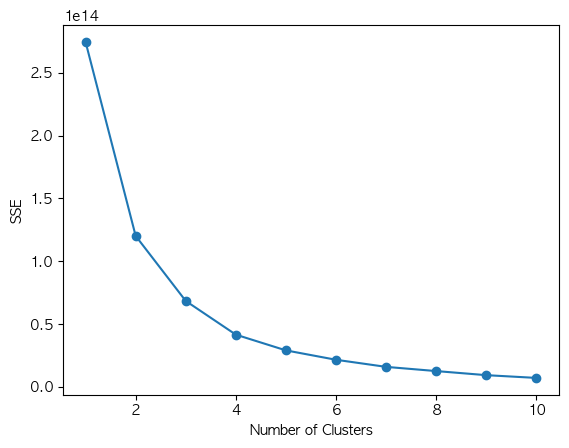

In [41]:
# elbow pointÎ°ú KÎ•º Íµ¨Ìï¥Î¥Ñ [Î≤îÏúÑÎ•º (1,40)ÏúºÎ°ú ÎëêÍ≥† Ìï¥ÎèÑ Í≤∞Í≥ºÎäî ÎòëÍ∞ôÏù¥ K=4Ïùº Îïå Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÍ∞Ä ÎÅùÎÇòÎäî Íµ¨Í∞ÑÏù¥ÏóàÏùå]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_train = train_df.drop(['credit'], axis=1)

# SSE Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_train)
    sse.append(kmeans.inertia_)

# ÏóòÎ≥¥Ïö∞ Î©îÏÑúÎìú Í∑∏ÎûòÌîÑ
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

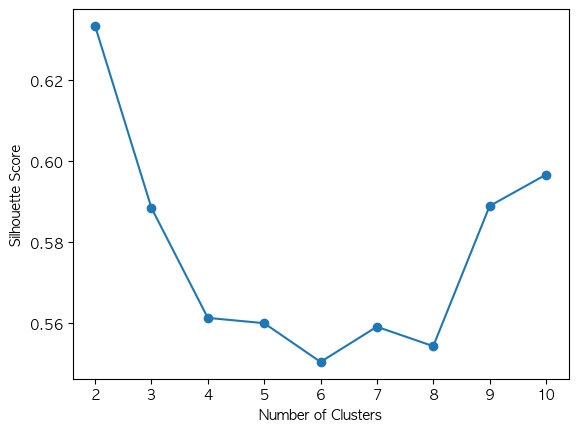

In [42]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_train)
    sil_score = silhouette_score(kmeans_train, kmeans.labels_)
    sil_scores.append(sil_score)

# Ïã§Î£®Ïó£ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [41]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Íµ¨ÏÑ± Î≥ÄÏàò ÏÉùÏÑ±!!
from sklearn.cluster import KMeans

kmeans_train = train_df.drop(['credit'], axis=1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
train_df['cluster'] = kmeans.predict(kmeans_train)
test_df['cluster'] = kmeans.predict(test_df)

## Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ìï¥Í≤∞ 

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [53]:
# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(train, names='credit', title='Original Credit Distribution')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
original_counts = train['credit'].value_counts()

In [46]:
# Î∞©Î≤ï 1: Under Random Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='Under Random Sampling')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
under_random_counts = pd.Series(y_resampled).value_counts()

In [47]:
# Î∞©Î≤ï 2: Tomek Links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='Tomek Links')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
tomek_links_counts = pd.Series(y_resampled).value_counts()

In [48]:
# Îç∞Ïä§ÌÅ¨ÌÉëÏúºÎ°ú ÎèåÎ†§Î¥êÏïº ÌïòÎÇò? Ïô§ÏºÄ Îß•Î∂Å ÏãúÍ∞Ñ Ïò§Îûò Í±∏Î¶¨Îäî Í≤ÉÏùÑ Îñ†ÎÇòÏÑú Ïô§ÏºÄ ÏÜåÎ¶¨Î•º ÎÇ¥ÏßÄ..?

# Î∞©Î≤ï 3: CNN Rule
cnn = CondensedNearestNeighbour()
X_resampled, y_resampled = cnn.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='CNN Rule')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
cnn_counts = pd.Series(y_resampled).value_counts()

KeyboardInterrupt: 

In [49]:
# Î∞©Î≤ï 4: Over Random Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='Over Random Sampling')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
over_random_counts = pd.Series(y_resampled).value_counts()

In [50]:
# Î∞©Î≤ï 5: SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='SMOTE')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
smote_counts = pd.Series(y_resampled).value_counts()

In [51]:
# Î∞©Î≤ï 6: Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = bsmote.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='Borderline-SMOTE')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
bsmote_counts = pd.Series(y_resampled).value_counts()

In [52]:
# Î∞©Î≤ï 7: ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(train.drop('credit', axis=1), train['credit'])

# Credit Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig = px.pie(pd.DataFrame(y_resampled, columns=['credit']), names='credit', title='ADASYN')
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
adasyn_counts = pd.Series(y_resampled).value_counts()

In [55]:
import plotly.graph_objects as go

# Î™®Îì† Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞
result_df = pd.DataFrame({
    'Original': original_counts,
    'Under Random Sampling': under_random_counts,
    'Tomek Links': tomek_links_counts, # Ïñú Ïôú Í∞úÏàò ÏïàÎßûÎÉê? -> Î∂àÍ∑†ÌòïÏù¥ Ïã¨Ìïú Í≤ΩÏö∞ Í±∞Î¶¨Ïóê Îî∞Îùº Ïù¥Îü¥ Ïàò ÏûàÏùå.
    'CNN Rule': under_random_counts, # KNNÍ≥º ÎπÑÏä∑Ìïú Î∞©ÏãùÏù¥Îùº ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶º. ÏïàÌï† Í≤ÉÏù¥Í∏∞Ïóê Ìå®Ïä§
    'Over Random Sampling': over_random_counts,
    'SMOTE': smote_counts,
    'Borderline-SMOTE': bsmote_counts,
    'ADASYN': adasyn_counts
})

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig = go.Figure()

for credit_value in result_df.index:
    fig.add_trace(go.Bar(x=result_df.columns, y=result_df.loc[credit_value], name=f'Credit {credit_value}'))

fig.update_layout(barmode='group', title='Credit Distribution Comparison', xaxis_title='Sampling/Transformation Method', yaxis_title='Count')
fig.show()

In [ ]:
train_df.info()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df.drop('credit', axis=1), train_df['credit'])

# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train_df_resampled = pd.DataFrame(X_resampled, columns=train_df.columns[:-1])  # Î™©Ï†Å Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌäπÏÑ±
train_df_resampled['credit'] = y_resampled  # Î™©Ï†Å Î≥ÄÏàò Ï∂îÍ∞Ä

# train_df_resampledÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÌõÑ Î™®Îç∏ ÌïôÏäµ Îì±ÏùÑ ÏßÑÌñâ

In [ ]:
# üî• Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÏûêÏ≤¥Í∞Ä ÏÑ±Îä•ÏùÑ ÎÜíÏó¨Ï£ºÎäî Í≤ΩÏö∞Í∞Ä ÏûàÍ∏¥ ÌïúÎç∞, Ïö∞Î¶∞ ÏïÑÎãò. Í≤∞Í≥ºÍ∞Ä Ï¢ãÏßÄ ÏïäÍ≤å ÎÇòÏò¥! [ÎØ∏Ïã§Ïãú ÏòàÏ†ï]
# üî• Ïñ∏Îçî ÏÉòÌîåÎßÅÏùÄ Ï†ïÎ≥¥Ïùò ÏÜêÏã§ÏùÑ Î∂àÎü¨Ïò§Î©¥ÏÑú, Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùò Í≤ΩÏö∞ Ïñ∏Îçî ÏÉòÌîåÎßÅÎèÑ Í∑∏Î†áÏßÄÎßå, Í≥º/Í≥ºÏÜå Ï†ÅÌï©Ïù¥ Î∞úÏÉùÎê† Îïå ÏûàÏùå
train_df_resampled.info()

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding as LLE
from umap import UMAP

In [ ]:
# PCA Ï†ÅÏö©Ìï¥Î≥¥Í∏∞
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ïà´ÏûêÌòï ÌäπÏÑ± ÏÑ†ÌÉù
numeric_features = train_df.select_dtypes(include=[np.number])

# Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî (Standardization)
scaler = StandardScaler()
numeric_features_standardized = scaler.fit_transform(numeric_features)

# PCA Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
n_components = 2
pca = PCA(n_components=n_components)
train_df_pca = pca.fit_transform(numeric_features_standardized)

# PCA Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂úÎ†•
print("Original shape:", train_df.shape)
print("Transformed shape:", train_df_pca.shape)

In [ ]:
# Í∞Å Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Î≤ïÏùÑ Ï†ïÏùò

# PCA: Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù
pca = PCA(n_components=10)  # Ï∂ïÏÜåÌï† Ï∞®ÏõêÏùò ÏàòÎ•º ÏÑ§Ï†ïÌï®. Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ÏùÑ ÏñºÎßàÎÇò Î≥¥Ï°¥Ìï†ÏßÄ Í≤∞Ï†ï

# LDA: ÏÑ†Ìòï ÌåêÎ≥Ñ Î∂ÑÏÑù
lda = LDA(n_components=2)    # Î™©Ìëú Ï∞®ÏõêÏùò ÏàòÎ•º ÏÑ§Ï†ïÌï®. ÌÅ¥ÎûòÏä§ Í∞ÑÏùò Ï∞®Ïù¥Î•º ÏµúÎåÄÌôîÌïòÎäî ÌäπÏÑ± Î≤°ÌÑ∞Î•º Ï∞æÏïÑ Ï∞®ÏõêÏùÑ Ï∂ïÏÜå

# t-SNE: t-distributed Stochastic Neighbor Embedding
tsne = TSNE(n_components=2)  # Ï∂ïÏÜåÌï† Ï∞®ÏõêÏùò ÏàòÎ•º ÏÑ§Ï†ïÌï®. Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Ïùò Íµ∞Ïßë Í∞Ñ Íµ¨Î∂ÑÏùÑ Í∞ïÌôîÌïòÏó¨ ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©

# LLE: Locally Linear Embedding
lle = LLE(n_neighbors=10, n_components=2)  # Ïù¥ÏõÉÏùò ÏàòÏôÄ Î™©Ìëú Ï∞®ÏõêÏùò ÏàòÎ•º ÏÑ§Ï†ïÌï®. Íµ≠Î∂ÄÏ†ÅÏù∏ Ïó∞Í≤∞ÏùÑ Î≥¥Ï°¥ÌïòÎäî Î∞©ÏãùÏúºÎ°ú Ï∞®ÏõêÏùÑ Ï∂ïÏÜå

# UMAP: Uniform Manifold Approximation and Projection
umap = UMAP(n_components=2)  # Ï∂ïÏÜåÌï† Ï∞®ÏõêÏùò ÏàòÎ•º ÏÑ§Ï†ïÌï®. t-SNEÏôÄ Ïú†ÏÇ¨Ìïú ÎπÑÏÑ†Ìòï Ï∞®Ïõê Ï∂ïÏÜå Î∞©Î≤ïÏúºÎ°ú Ìö®Ïú®Ï†ÅÏù∏ Í≤∞Í≥ºÎ•º Ï†úÍ≥µ

# ÌÉÄÍ≤ü Î≥ÄÏàò : credit
train_labels = train['credit']

# Ï∞®Ïõê Ï∂ïÏÜå Ï†ÅÏö©
pca_result = pca.fit_transform(train)
lda_result = lda.fit_transform(train, train_labels)  # LDAÎäî ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥Í∞Ä ÌïÑÏöî
tsne_result = tsne.fit_transform(train)
lle_result = lle.fit_transform(train)
umap_result = umap.fit_transform(train)

# Í≤∞Í≥º ÌôïÏù∏
print(f"PCA Í≤∞Í≥º Ï∞®Ïõê: {pca_result.shape}")
print(f"LDA Í≤∞Í≥º Ï∞®Ïõê: {lda_result.shape}")
print(f"t-SNE Í≤∞Í≥º Ï∞®Ïõê: {tsne_result.shape}")
print(f"LLE Í≤∞Í≥º Ï∞®Ïõê: {lle_result.shape}")
print(f"UMAP Í≤∞Í≥º Ï∞®Ïõê: {umap_result.shape}")

# <span style="color:gray">‚≠êÔ∏èModeling‚≠êÔ∏è</span> 

In [42]:
# Ïö∞ÏÑ† Îç∞Ïù¥ÌÑ∞ ÏµúÏ¢Ö Í≤∞Í≥º Î≥µÏÇ¨ Ìï¥ÎÜìÍ∏∞
train = train_df.copy()
test = test_df.copy()

## <span style="color:orange">[Î≥µÏäµ X] Îã§ÏñëÌïòÍ≤å Ï†ÅÏö©Ìï¥Î≥¥Í∏∞</span> 

#### [1] kfold Ï†ÅÏö©ÌïòÏßÄ ÏïäÍ≥† Îã®ÏàúÌûà Î∂ÑÎ•ò Î™®Îç∏ 6Í∞ú Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# train Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î™©Ï†ÅÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò Î∂ÑÎ¶¨
X_train = train.drop('credit', axis=1)
y_train = train['credit']

# test Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÑ§Î™ÖÎ≥ÄÏàò Î∂ÑÎ¶¨
X_test = test.copy()

# [ÏòàÏãú] Îã®ÏàúÌûà Í∞Å Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Í∞Å Î™®Îç∏ ÏòàÏ∏°
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
logistic_pred = logistic_model.predict(X_test)

# ÏòàÏ∏° Í≤∞Í≥º ÌôïÏù∏
print("Random Forest ÏòàÏ∏° Í≤∞Í≥º:", rf_pred)
print("Gradient Boosting ÏòàÏ∏° Í≤∞Í≥º:", gb_pred)
print("XGBoost ÏòàÏ∏° Í≤∞Í≥º:", xgb_pred)
print("LightGBM ÏòàÏ∏° Í≤∞Í≥º:", lgbm_pred)
print("CatBoost ÏòàÏ∏° Í≤∞Í≥º:", catboost_pred)
print("Logistic Regression ÏòàÏ∏° Í≤∞Í≥º:", logistic_pred)

#### [2] catboost S_K-Fold ÏÇ¨Ïö©

In [ ]:
# cat boost ÏÇ¨Ïö©

from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

# Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÏÜçÏÑ± ÏÑ§Ï†ï (Ïö∞ÏÑ†, ÏΩîÎìúÍ≥µÏú†Ïóê ÎÇòÏôÄÏûàÎäî ÏûÑÏùòÏùò Í∞í Ï†ÅÏö©Ìï¥Î¥Ñ)
n_est = 2000
seed = 42
n_fold = 15
n_class = 3

# ÌÉÄÍ≤ü Î≥ÄÏàò ÏÑ§Ï†ï
target = 'credit'

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÑ§Ï†ï
X = train_df.drop(target, axis=1)
y = train_df[target]
X_test = test_df

# Stratified K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
    folds.append((train_idx, valid_idx))

# CatBoost Î™®Îç∏ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))

# CatBoostÏóê Ï†ÅÏö©Ìï† Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàò Î™©Î°ù
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

# ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ
for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    
    # CatBoostÏóêÏÑú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

    # CatBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî Î∞è ÌïôÏäµ
    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥º ÎàÑÏ†Å
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    
    # ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏùò Î°úÍ∑∏ ÏÜêÏã§ Ï∂úÎ†•
    print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î°úÍ∑∏ ÏÜêÏã§ Ï∂úÎ†•
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

In [ ]:
# ÌîºÏ≤òÏ§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò

def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

In [ ]:
cat_pred_test

In [ ]:
# Í≤∞Í≥º ÎåÄÏûÖ
sample_submission_df.iloc[:, 1:] = cat_pred_test

In [ ]:
sample_submission_df

In [ ]:
# Í≤∞Í≥º Ï†ÄÏû•
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [3] Îã§Ï§ëÎ°úÏßÄÏä§Ìã±ÌöåÍ∑Ä train_test_split ÏÇ¨Ïö©

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss  # Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ
import pandas as pd

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train = train_df.drop(['credit'], axis=1)  # Î™©Ï†Å Î≥ÄÏàòÏù∏ 'credit' Ï†úÏô∏Ìïú Î≥ÄÏàòÎì§ÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
y_train = train_df['credit']  # Î™©Ï†Å Î≥ÄÏàòÏù∏ 'credit'
X_test = test_df.copy()  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

# ÌëúÏ§ÄÌôî (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Îã§Ï§ë Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
logis_pred_test = model.predict_proba(X_test_scaled)

# Í≤∞Í≥º ÌôïÏù∏
print(logis_pred_test)

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î°úÍ∑∏ ÏÜêÏã§ Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
logis_pred = model.predict_proba(X_train_scaled)
log_loss_value = log_loss(y_train, logis_pred)
print(f'\tLog Loss: {log_loss_value:.6f}')

In [ ]:
# ÌîºÏ≤òÏ§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò

def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [ ]:
plot_feature_importance(model.coef_[0],X_test.columns,'Multiple Logistic Regression')

In [ ]:
# Í≤∞Í≥º ÎåÄÏûÖ
sample_submission_df.iloc[:, 1:] = logis_pred_test

In [ ]:
sample_submission_df

In [ ]:
# Í≤∞Í≥º Ï†ÄÏû•
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [4] Îã§Ï§ëÎ°úÏßÄÏä§Ìã±ÌöåÍ∑Ä S_K-Fold ÏÇ¨Ïö©

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import numpy as np

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train = train_df.drop(['credit'], axis=1)  # Î™©Ï†Å Î≥ÄÏàòÏù∏ 'credit' Ï†úÏô∏Ìïú Î≥ÄÏàòÎì§ÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
y_train = train_df['credit']  # Î™©Ï†Å Î≥ÄÏàòÏù∏ 'credit'
X_test = test_df.copy()  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

# Îã§Ï§ë Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÍµêÏ∞® Í≤ÄÏ¶ù
def cross_validate_logistic_regression(X, y, X_test, n_fold=15):
    skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    
    # Îã§Ï§ë Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

    # ÌëúÏ§ÄÌôî (Standardization)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_scaled = scaler.transform(X_test)
    
    # ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    logis_pred = np.zeros((X.shape[0], 3))
    logis_pred_test_final = np.zeros((X_test.shape[0], 3))  # Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ
    
    for fold, (train_idx, valid_idx) in enumerate(skfold.split(X, y)):
        print(f'\n----------------- Fold {fold} -----------------\n')
        X_train, X_valid, y_train, y_valid = X_scaled[train_idx], X_scaled[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]

        # Î™®Îç∏ ÌïôÏäµ
        model.fit(X_train, y_train)
        
        # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
        logis_pred[valid_idx] = model.predict_proba(X_valid)
        logis_pred_test_final += model.predict_proba(X_test_scaled) / n_fold  # Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ
        
        # ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏùò Î°úÍ∑∏ ÏÜêÏã§ Ï∂úÎ†•
        print(f'CV Log Loss Score: {log_loss(y_valid, logis_pred[valid_idx]):.6f}')

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î°úÍ∑∏ ÏÜêÏã§ Ï∂úÎ†•
    log_loss_value = log_loss(y, logis_pred)
    print(f'\tLog Loss: {log_loss_value:.6f}')
    
    return logis_pred, logis_pred_test_final  # Î∞òÌôòÍ∞í ÏàòÏ†ï

# ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ
logis_pred, logis_pred_test_final = cross_validate_logistic_regression(X_train, y_train, X_test)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
print(logis_pred_test_final)


In [ ]:
logis_pred_test_final

In [ ]:
# Í≤∞Í≥º ÎåÄÏûÖ
sample_submission_df.iloc[:, 1:] = logis_pred_test_final

In [ ]:
sample_submission_df

In [ ]:
# Í≤∞Í≥º Ï†ÄÏû•
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [5] Î™®Îëê Ï†ÅÏö©Ìï¥Î¥Ñ [12Í∞ú Î∂ÑÎ•òÍ∏∞Î≤ï Ï†ÅÏö©ÎßåÌï®.]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Ìï®Ïàò (load_data)Î•º Í∞ÄÏ†ïÌïòÍ≥†, ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
# train_df, test_df = load_data()

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = train_df.drop('credit', axis=1)
y = train_df['credit']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶ò Î™©Î°ù
classifiers = [
    ('ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏', RandomForestClassifier()),
    ('ÏóêÏù¥Îã§Î∂ÄÏä§Ìä∏', AdaBoostClassifier()),
    ('Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ', GradientBoostingClassifier()),
    ('Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä', LogisticRegression()),
    ('SGD Î∂ÑÎ•òÍ∏∞', SGDClassifier(loss='log')),
    ('K ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ', KNeighborsClassifier()),
    ('ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à', GaussianNB()),
    ('Ïã†Í≤ΩÎßù', MLPClassifier()),
    ('SVM', SVC(probability=True)),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier())
]

# Í∞Å Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÌïòÍ≥† ÌèâÍ∞ÄÌï©ÎãàÎã§.
results = []
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_val)
    logloss = log_loss(y_val, y_pred_proba)
    results.append((clf_name, logloss))
    print(f'{clf_name} - Log Loss: {logloss}')

# Í≤∞Í≥ºÎ•º Ï†ïÎ†¨ÌïòÍ≥† ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
results.sort(key=lambda x: x[1])
best_model_name, best_logloss = results[0]
print(f'\nÏµúÏ†ÅÏùò Î™®Îç∏: {best_model_name} (Log Loss: {best_logloss})')

# ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°Ìï©ÎãàÎã§.
best_model = [clf for clf_name, clf in classifiers if clf_name == best_model_name][0]
test_pred_proba = best_model.predict_proba(test_df)

In [ ]:
# Í≤∞Í≥º ÎåÄÏûÖ
sample_submission_df.iloc[:, 1:] = test_pred_proba

In [ ]:
sample_submission_df

In [ ]:
# Í≤∞Í≥º Ï†ÄÏû•
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [6] Íµ∞ÏßëÌôî Î≥ÄÏàò Ï∂îÍ∞Ä + ÏπºÎüºÏÇ≠Ï†ú + catboost + s_f_fold

In [ ]:
# ÌååÏÉùÎ≥ÄÏàòÏôÄ Îã§Ï§ëÍ≥µÏÑ†ÏùÑ Î≥¥Ïù¥Îäî Ïª¨Îüº ÏÇ≠Ï†ú
cols = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

n_est = 2000
seed = 42
n_fold = 15
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']
for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_pred_test += model_cat.predict_proba(X_test) / n_fold
  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

In [ ]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

In [ ]:
sample_submission_df.iloc[:, 1:] = cat_pred_test
sample_submission_df

In [ ]:
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [7] pca Ï†ÅÏö©.. Ïã§Ìå®

In [ ]:
# Ï∞®ÏõêÏ∂ïÏÜåÍπåÏßÄ Ìï¥Î≥∏Í±∞ [Î¨∏Ï†úÎäî test Îç∞Ïù¥ÌÑ∞ÎèÑ Ï∞®ÏõêÏ∂ïÏÜå Ìï¥ÏïºÌï®]
# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú catboost ÏΩîÎìú Îã§ ÏàòÏ†ïÌï¥Ïïº Ìï®.. ÏãúÍ∞Ñ Ïò§Îûò Í±∏Î¶ò ÎìØ.. ÎÇòÏ§ëÏóê ÌïòÏûê!

In [ ]:
train_df_pca

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

n_est = 2000
seed = 42
n_fold = 15
n_class = 3

X = train_df_pca # Ï∞®ÏõêÏ∂ïÏÜåÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÎßåÏúºÎ°ú ÏßÑÌñâÎêúÎã§ÎäîÏ†ê Ï∞∏Í≥†!
y = train['credit']
X_test = test

skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']
for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_pred_test += model_cat.predict_proba(X_test) / n_fold
  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

#### [8] Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï†ÅÏö© + Ï∫£Î∂ÄÏä§Ìä∏

In [ ]:
# SMOTE, Ïò§Î≤ÑÎûúÎç§ÏÉòÌîåÎßÅ Îëò Îã§ Ï†ÅÏö©Ìï¥Î≥∏ Í≤∞Í≥º [train_df_resampled]
# ÏïÑÏâΩÍ≤åÎèÑ Îëò Îã§ IDÎäî Ìè¨Ìï®Ïù¥ ÏïàÎê® (Ïù¥Ïú† :  Ïò§ÏßÅ ÏûÖÎ†• ÌäπÏÑ±Í≥º ÎåÄÏÉÅ Î≥ÄÏàò(Î™©Ï†Å Î≥ÄÏàò)ÏóêÎßå Ï†ÅÏö©ÎêòÍ∏∞Ïóê ÏãùÎ≥ÑÏûêÎäî ÏûêÎèô Ï†úÍ±∞ÏûÑ)

In [ ]:
# train Îç∞Ïù¥ÌÑ∞ Ìñâ Î™áÍ∞ú ÏÇ≠Ï†úÌï¥ÏÑú Ïò§Î•òÎÇ®.. index Ï¥àÍ∏∞Ìôî Ìï¥Ï§òÏïº Ìï®.
train_df_resampled.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Ïö∞ÏÑ† Îç∞Ïù¥ÌÑ∞ ÏµúÏ¢Ö Í≤∞Í≥º Î≥µÏÇ¨ Ìï¥ÎÜìÍ∏∞
train = train_df_resampled.copy()
test = test_df.copy()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

n_est = 2000
seed = 42
n_fold = 15
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_pred_test += model_cat.predict_proba(X_test) / n_fold
  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

In [ ]:
sample_submission_df.iloc[:, 1:] = cat_pred_test
sample_submission_df

In [ ]:
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### [9] Î≥ÄÏàò ÏÑ†ÌÉù(3Í∞úÎßå..?) + SMOTE(X) + catboost

In [ ]:
# Î≥ÄÏàòÏÑ†ÌÉù ÍπåÏßÄ! SMOTE ÏïàÌïòÍ≥† Î≥ÄÏàòÏÑ†ÌÉùÌïú Í≤ÉÏóê catboost Ï†ÅÏö©
# Í∑ºÎç∞ Î≥ÄÏàòÏÑ†ÌÉù Îî∞Î°ú VIF ÌïòÏßÄ ÎßêÍ≥† ÏΩîÎìúÍ≥µÏú†Ïóê ÎÇòÏò® Í≤ÉÏ≤òÎüº 3Í∞úÎßå ÏÇ≠Ï†ú

In [ ]:
# train Îç∞Ïù¥ÌÑ∞ Ìñâ Î™áÍ∞ú ÏÇ≠Ï†úÌï¥ÏÑú Ïò§Î•òÎÇ®.. index Ï¥àÍ∏∞Ìôî Ìï¥Ï§òÏïº Ìï®.
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Ïö∞ÏÑ† Îç∞Ïù¥ÌÑ∞ ÏµúÏ¢Ö Í≤∞Í≥º Î≥µÏÇ¨ Ìï¥ÎÜìÍ∏∞
train = train_df.copy()
test = test_df.copy()

In [ ]:
cols = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

n_est = 2000
seed = 42
n_fold = 15
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']
for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_pred_test += model_cat.predict_proba(X_test) / n_fold
  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

In [ ]:
sample_submission_df.iloc[:, 1:] = cat_pred_test
sample_submission_df

In [ ]:
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

## <span style="color:orange">[Ï¥ù Î≥µÏäµ ÌõÑ Ïû¨ ÎèÑÏ†Ñ]</span> 

#### Catboost Ï†ÅÏö©

In [43]:
# [1] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO, Íµ¨Í∞ÑÌôîX, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[ÏΩîÎìú]3, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold)
# [2] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO, Íµ¨Í∞ÑÌôîO, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[ÏΩîÎìú]3, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold)
# [3] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO, Íµ¨Í∞ÑÌôîX, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[VIF]6, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold)
# [4] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO(Ïù¥ÏÉÅÏπò 1ÌñâÏÇ≠Ï†ú ÎØ∏Ïã§Ïãú), Íµ¨Í∞ÑÌôîX, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[VIF]6, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold) üî•
# [5] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO(Ïù¥ÏÉÅÏπò 1ÌñâÏÇ≠Ï†ú ÎØ∏Ïã§Ïãú), Íµ¨Í∞ÑÌôîO, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[VIF]6, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò, Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold[K=20])
# [6] Í≤∞Ï∏°NaN, Ïù¥ÏÉÅÏπòO(Ïù¥ÏÉÅÏπò 1ÌñâÏÇ≠Ï†ú ÎØ∏Ïã§Ïãú), Íµ¨Í∞ÑÌôîX, ÌååÏÉù13, Ordinal, Î≥ÄÏàòÏÑ†ÌÉù[VIF]6, log1p, ÌëúÏ§ÄÌôî, Íµ∞ÏßëÌôîÎ≥ÄÏàò[n=4], Î∂àÍ∑†ÌòïX, Ï∞®ÏõêX, (Catboost + S_K-fold)

In [44]:
n_est = 2000 # Ìä∏Î¶¨Ïùò Í∞úÏàò
seed = 42
n_fold = 15
n_class = 3 # Î∂ÑÎ•òÎ•º 3Í∞úÎ°ú ÎÇòÎàÑÍ∏∞ ÎïåÎ¨∏Ïóê Ï¥àÍ∏∞ÌôîÎ•º ÏúÑÌïú ÎπÑÏñ¥ÏûàÎäî 3Í∞ú Î∂ÑÎ•∞ ÌÅ¥ÎûòÏä§ ÏÉùÏÑ±

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [45]:
# Stratified K-Fold ÏÑ§Ï†ï
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx)) # folds Î¶¨Ïä§Ìä∏ÏóêÎäî Í∞Å FoldÏóê ÎåÄÌïú ÌõàÎ†®(train) Î∞è Í≤ÄÏ¶ù(valid) Ïù∏Îç±Ïä§Í∞Ä Ï†ÄÏû•

# CatBoost Î™®Îç∏ Î∞è ÏòàÏ∏° Ï¥àÍ∏∞Ìôî
cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))

# [Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Îì§ Ï¥ù 6Í∞ú]
# Ï≤òÏùå Î≤îÏ£ºÌòïÏùÄ 9Í∞úÏòÄÎäîÎç∞ Ïôú 6Í∞úÎßå Ìï†Íπå?
# -> gender, car, realityÎäî Ïï†Ï¥àÏóê Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏóÜÎçò phone Ï≤òÎüº 0ÎòêÎäî 1Ïùò Ïú†Î¨¥ Îç∞Ïù¥ÌÑ∞ÏûÑ. Ï¶â Ïù¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏûÑ
# [Í≤∞Î°†] : Ï∫£ Î∂ÄÏä§Ìä∏ÏóêÏÑúÎäî "Î≤îÏ£ºÍ∞Ä Ïó¨Îü¨Í∞úÏù∏ Í≤ÉÎì§ÏùÑ Î≤îÏ£ºÌòïÏúºÎ°ú ÏÑ†Ï†ï" Ìï¥ÎÜìÍ≥† ÏßÑÌñâÌïòÎäîÍ±∞ Í∞ôÏùå.
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

# Í∞Å FoldÏóê ÎåÄÌï¥ CatBoost Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≥† ÌõàÎ†®
for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
    
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]

  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)

    # 15Î°ú ÎÇòÎà†ÏÑú ÌèâÍ∑† ÎßåÎì§Ïñ¥ Í≤∞Í≥ºÎ°ú ÎßåÎì§Ïñ¥ Î≤ÑÎ¶¨Í∏∞~!
  cat_pred_test += model_cat.predict_proba(X_test) / n_fold

  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')

# Î™®Îì† FoldÏóêÏÑúÏùò Í≤ÄÏ¶ù Í≤∞Í≥ºÎ•º Ï¢ÖÌï©ÌïòÏó¨ ÏµúÏ¢Ö ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥ºÎ•º Ï∂úÎ†•
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')


----------------- Fold 0 -----------------

Learning rate set to 0.115127
0:	learn: 1.0348531	test: 1.0333702	best: 1.0333702 (0)	total: 90.8ms	remaining: 1m 30s
100:	learn: 0.7053679	test: 0.6411563	best: 0.6411563 (100)	total: 2.07s	remaining: 18.4s
200:	learn: 0.6886603	test: 0.6400423	best: 0.6394533 (181)	total: 4.16s	remaining: 16.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.639453254
bestIteration = 181

Shrink model to first 182 iterations.
CV Log Loss Score: 0.639453

----------------- Fold 1 -----------------

Learning rate set to 0.115127
0:	learn: 1.0347006	test: 1.0340077	best: 1.0340077 (0)	total: 14.8ms	remaining: 14.8s
100:	learn: 0.7067371	test: 0.6727429	best: 0.6727382 (98)	total: 1.8s	remaining: 16.1s
200:	learn: 0.6880882	test: 0.6733037	best: 0.6722633 (126)	total: 3.89s	remaining: 15.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6722632563
bestIteration = 126

Shrink model to first 127 iterations.
CV Log Loss 

In [46]:
# ÌîºÏ≥êÏ§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†úÏûë!

def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

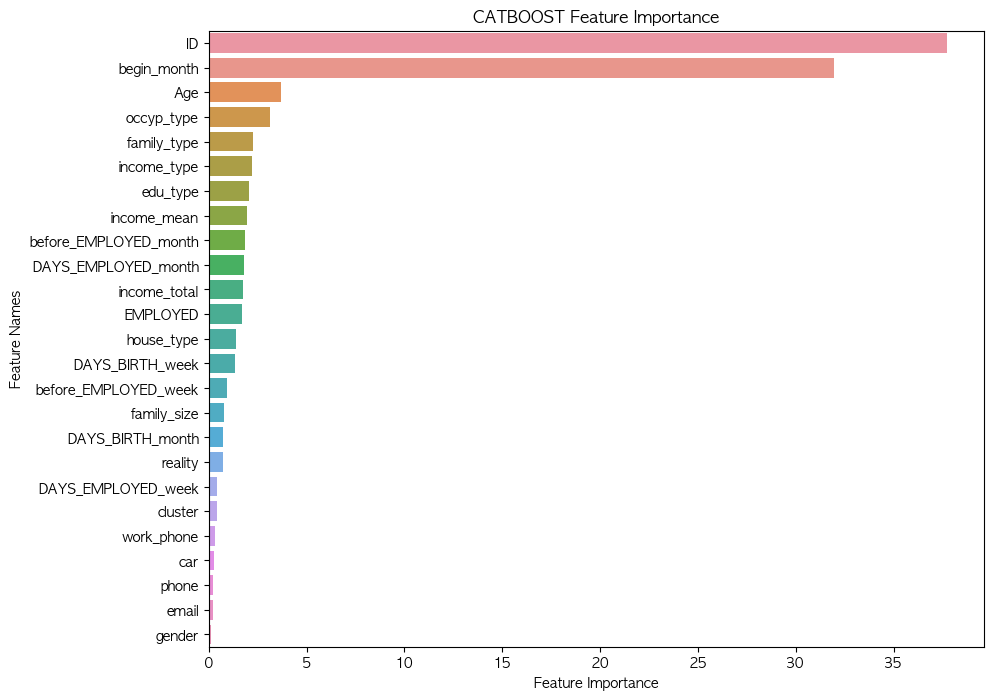

In [47]:
# ÌîºÏ≥êÏ§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')
# model_cat.get_feature_importance() ÏÜçÏÑ±Ïù¥ ÌîºÏ≥êÏ§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§å
# X_test.columns ÏπºÎüº Ïù¥Î¶ÑÎì§ÏùÑ Î≥¥Ïó¨Ï§å

In [48]:
# Î™®Îì† Ìñâ(:)ÏùÑ Ìè¨Ìï®ÌïòÎêò, Îëê Î≤àÏß∏ Ïó¥Î∂ÄÌÑ∞ ÎßàÏßÄÎßâ Ïó¥ÍπåÏßÄÏùò Î™®Îì† Ïó¥(1:)ÏùÑ ÏÑ†ÌÉù
sample_submission_df.iloc[:, 1:] = cat_pred_test
sample_submission_df

index         0         1         2
0     26457  0.114418  0.166037  0.719545
1     26458  0.342588  0.201669  0.455743
2     26459  0.039816  0.080545  0.879639
3     26460  0.055150  0.079136  0.865714
4     26461  0.085233  0.225309  0.689458
...     ...       ...       ...       ...
9995  36452  0.071628  0.226853  0.701518
9996  36453  0.310305  0.185141  0.504554
9997  36454  0.051066  0.118369  0.830565
9998  36455  0.150250  0.313198  0.536553
9999  36456  0.068477  0.449615  0.481909

[10000 rows x 4 columns]

In [49]:
sample_submission_df.to_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/submission_Final.csv', index=False)

#### Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù

In [ ]:
# ÏúÑÏóêÏÑú Îî∞Î°ú ÏßÑÌñâÌñàÏóàÎäîÎç∞, Ï¢ãÏùÄ Í≤∞Í≥ºÍ∞Ä Îî±Ìûà ÏóÜÏóàÏùå.

#### LGBM

In [ ]:
# ÏúÑÏóêÏÑú Îî∞Î°ú ÏßÑÌñâÌñàÏóàÎäîÎç∞, Ï¢ãÏùÄ Í≤∞Í≥ºÍ∞Ä Îî±Ìûà ÏóÜÏóàÏùå.

#### XGB

In [ ]:
# ÏúÑÏóêÏÑú Îî∞Î°ú ÏßÑÌñâÌñàÏóàÎäîÎç∞, Ï¢ãÏùÄ Í≤∞Í≥ºÍ∞Ä Îî±Ìûà ÏóÜÏóàÏùå.

#### Random Forest

In [ ]:
# ÏúÑÏóêÏÑú Îî∞Î°ú ÏßÑÌñâÌñàÏóàÎäîÎç∞, Ï¢ãÏùÄ Í≤∞Í≥ºÍ∞Ä Îî±Ìûà ÏóÜÏóàÏùå.

## <span style="color:orange">[Ïó∞Ïö∞Í∞Ä Î™®Îç∏ÎßÅ Ìïú Í≤ÉÎì§]</span> 

In [1]:
# ÎÇòÏ§ëÏóê Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏΩîÎìú ÏÑ§Î™Ö Ïó∞Ïö∞ÌïúÌÖå Î∂ÄÌÉÅÌï¥ÏÑú Îì§Ïñ¥Î≥¥Ïûê. [ÎÑàÎ¨¥ Î≥µÏû°ÌïòÍ≥† Îí§Ï£ΩÎ∞ïÏ£ΩÏù¥Îùº ÏΩîÎìú Ìï¥ÏÑùÏù¥ ÎÑàÎ¨¥ Ïñ¥Î†§ÏõÄ]

### Î™®Îç∏ÎßÅ

In [ ]:
from typing import Dict, Tuple, Union, List

In [ ]:
def stratified_kfold_cat(
    params: Dict[str, Union[int, float, str, List[str]]],
    n_fold,
    X,
    target,
    X_test,
) -> Tuple[np.ndarray, np.ndarray]:
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, target)
    cat_oof = np.zeros((X.shape[0], 3))
    cat_preds = np.zeros((X_test.shape[0], 3))
    cat_cols = [c for c in X.columns if X[c].dtypes == "int64"]

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = target.iloc[train_idx], target.iloc[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model = CatBoostClassifier(**params)

        model.fit(
            train_data,
            eval_set=valid_data,
            early_stopping_rounds=100,
            use_best_model=True,
            verbose=100,
        )

        cat_oof[valid_idx] = model.predict_proba(X_valid)
        cat_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(target, cat_oof)
    print(f"Log Loss Score: {log_score:.5f}\n")
    return cat_oof, cat_preds

In [ ]:
# Light GBM
def stratified_kfold_lgbm(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.ndarray, np.ndarray]:
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    lgb_oof = np.zeros((X.shape[0], 3))
    lgb_preds = np.zeros((X_test.shape[0], 3))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        pre_model = LGBMClassifier(**params)

        pre_model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_metric='multi_logloss',
        )
        params2 = params.copy()
        params2["learning_rate"] = params["learning_rate"] * 0.1

        model = LGBMClassifier(**params2)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_metric='multi_logloss',
            init_model=pre_model,
        )
        lgb_oof[valid_idx] = model.predict_proba(X_valid)
        lgb_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(y, lgb_oof)
    print(f"Log Loss Score: {log_score:.5f}")

    return lgb_oof, lgb_preds

In [ ]:
# XGB
def stratified_kfold_xgb(
    params: Dict[str, Union[int, float, str]],
    n_fold,
    X,
    y,
    X_test,
) -> Tuple[np.ndarray, np.ndarray]:

    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    xgb_oof = np.zeros((X.shape[0], 3))
    xgb_preds = np.zeros((X_test.shape[0], 3))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBClassifier(**params)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict_proba(X_valid)
        xgb_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(y, xgb_oof)
    print(f"Log Loss Score: {log_score:.5f}")

    return xgb_oof, xgb_preds

In [ ]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï

cat_params = {
    "random_state": 42,
    "eval_metric": "MultiClass",
    "loss_function": "MultiClass",
    'learning_rate': 0.01443340240633889,
    'n_estimators': 6728, 'max_depth': 8,
    'random_strength': 51,
    "cat_features": ['income_type', 'edu_type', 'family_type', 'house_type','occyp_type','DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w','befor_EMPLOYED_year','ID','occyp_is']}
cat_oof, cat_preds = stratified_kfold_cat(cat_params, 10, X, target, X_test)

xgb_params = {
    "random_state": 42,
    "n_estimators": 10000,
    "objective": "multi:softmax",
    "eval_metric": "mlogloss",
    'learning_rate': 0.1,
    'max_depth': 4,
    'num_leaves': 4,
    'colsample_bytree': 0.65,
    'max_bin': 360}
xgb_oof, xgb_preds = stratified_kfold_xgb(xgb_params, 10, X, target, X_test)

lgb_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity":0,
    "random_state": 42,
    "boosting_type": "gbdt",
    "learning_rate": 0.05, 'max_depth': 5, 'num_leaves': 147,}
lgbm_oof, lgbm_preds = stratified_kfold_lgbm(lgb_params, 10, X, target, X_test)

train_pred = np.concatenate([cat_oof, lgbm_oof, xgb_oof], axis=1)
train_pred.shape

test_pred = np.concatenate([cat_preds, lgbm_preds, xgb_preds], axis=1)
test_pred.shape

In [ ]:
import torch
!pip install pytorch_tabnet
device = "cuda" if torch.cuda.is_available() else "cpu"
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

In [ ]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
splits = folds.split(train_pred, target)
net_oof = np.zeros((train_pred.shape[0], 3))
net_preds = np.zeros((test_pred.shape[0], 3))
for fold, (train_idx, valid_idx) in enumerate(splits):
    print(f"============ Fold {fold} ============\n")
    X_train, X_valid = train_pred[train_idx], train_pred[valid_idx]
    y_train, y_valid = target[train_idx], target[valid_idx]
    model = TabNetMultiTaskClassifier(
            n_d=64, n_a=64, n_steps=1,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=2e-2),
            scheduler_params = {"gamma": 0.9, "step_size": 50},
            scheduler_fn=torch.optim.lr_scheduler.StepLR,
            mask_type="entmax",
    )

    model.fit(
        X_train, y_train.reshape(-1,1),
        eval_set=[(X_valid, y_valid.reshape(-1,1))],
        max_epochs=100,
        batch_size=1024,
        eval_metric=["logloss"],
        virtual_batch_size=128,
        num_workers=1,
        drop_last=False
    )
    net_oof[valid_idx] = model.predict_proba(X_valid)
    net_preds += model.predict_proba(test_pred)[0] / n_fold
log_score = log_loss(train_y, net_oof)
print(f"Log Loss Score: {log_score:.5f}")

In [ ]:
seed=42
target = train['credit']
X =np.array(train.loc[:, train.columns != 'credit'])

# LabelEncoder Í∞ùÏ≤¥ ÏÉùÏÑ±
label_encoder = LabelEncoder()

# ÎùºÎ≤®ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
target= label_encoder.fit_transform(target)
n_iter=0
cv_accuracy=[]

In [ ]:
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# split Í∞úÏàò Ïä§ÌÖù ÎßåÌÅº train, test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îß§Î≤à Î∂ÑÌï†
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    cat.fit(X_train, y_train)

    pred = cat.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : {1},  ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {2},  Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Ïù∏Îç±Ïä§ : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## ÌèâÍ∑† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:', np.mean(cv_accuracy))

In [ ]:
str_kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# split Í∞úÏàò Ïä§ÌÖù ÎßåÌÅº train, test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îß§Î≤à Î∂ÑÌï†
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    xgb.fit(X_train, y_train)

    pred = xgb.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : {1},  ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {2},  Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Ïù∏Îç±Ïä§ : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## ÌèâÍ∑† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:', np.mean(cv_accuracy))

In [ ]:
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# split Í∞úÏàò Ïä§ÌÖù ÎßåÌÅº train, test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îß§Î≤à Î∂ÑÌï†
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    lgbm.fit(X_train, y_train)

    pred = lgbm.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : {1},  ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {2},  Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Ïù∏Îç±Ïä§ : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## ÌèâÍ∑† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:', np.mean(cv_accuracy))

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42,
                              verbose=0)
cat_model.fit(train_X,train_y)

val_pred = cat_model.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = cat_model.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

cat_test_pred_proba = cat_model.predict_proba(X_test)

In [ ]:
xgb_test_pred_proba = xgb.predict_proba(X_test)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=0)
lgbm.fit(train_X,train_y)

val_pred = lgbm.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = lgbm.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

lgbm_test_pred_proba = lgbm.predict_proba(X_test)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42,
                    verbosity=0
                    )
xgb.fit(train_X,train_y)

val_pred = xgb.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = xgb.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

xgb_test_pred_proba = xgb.predict_proba(X_test)

### ÌîºÏ≥ê Ï§ëÏöîÎèÑ

In [ ]:
!pip install graphviz

In [ ]:
feature_importance =xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')

In [ ]:
# Í∑∏ÎÉ• ÌôïÏù∏ÌïòÍ∏∞Ïóê ÌîºÏ≥êÏ¢ÖÎ•òÍ∞Ä 30Í∞úÎÇò ÎêòÏñ¥ ÌïúÎààÏóê Îì§Ïñ¥Ïò§ÏßÄ ÏïäÎäîÎã§.
print(lgbm.feature_importances_, '\n')
# ÏãúÎ¶¨Ï¶àÎ°ú ÎßåÎì§Ïñ¥ Ïù∏Îç±Ïä§Î•º Î∂ôÏù∏Îã§
ser = pd.Series(lgbm.feature_importances_, index=X_train.columns)

# ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ÏùÑ Ïù¥Ïö©ÌïúÎã§
ser.sort_values(ascending=False)

top15 = ser.sort_values(ascending=False)[:15]
top15 = top15.to_frame()
top15.rename(columns={0:'feature_importance'}, inplace=True)
top15.head(15)

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(xgb, random_state=42).fit(valid_X, valid_y)
eli5.show_weights(perm, feature_names = valid_X.columns.tolist())

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
explainer = shap.Explainer(cat_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)

### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù [ÎÇòÏ§ëÏóê pycaretÏúºÎ°ú ÌïòÏù¥Ïñ¥ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ìï¥Î≥¥Ïûê!]

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from optuna import create_study
sampler = optuna.samplers.TPESampler()

In [ ]:
def objective(trial: Trial) -> float:
    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "n_estimators": 10000,
        "objective": "multiclass",
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2)

    model = LGBMClassifier(**params_lgb,metric='multi_logloss')  # metric Ï∂îÍ∞Ä
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='multi_logloss')

# ÏòàÏ∏° ÌôïÎ•†Í∞í ÏñªÍ∏∞
    y_pred_proba = model.predict_proba(X_valid)

# log_loss Í≥ÑÏÇ∞
    score = log_loss(y_valid, y_pred_proba, labels=np.unique(y_valid))
    return score

study = optuna.create_study(direction='minimize', sampler=sampler,)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

In [ ]:
def objective(trial: Trial) -> float:
    params_xgb = {
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "max_bin": trial.suggest_int("max_bin", 200, 500),  # ÏàòÏ†ï: ÌóàÏö©Îêú Î≤îÏúÑ ÎÇ¥Ïùò Í∞íÏúºÎ°ú ÏàòÏ†ï
    }

    X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2)


    num_classes = len(np.unique(y_train))
    model = XGBClassifier(**params_xgb,verbosity=0, metric='mlogloss', num_class=num_classes)  # ÏàòÏ†ï: 'multiclass' ÎåÄÏã† 'mlogloss' ÏÇ¨Ïö©
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='mlogloss', verbose=False)  # ÏàòÏ†ï: 'multiclass' ÎåÄÏã† 'mlogloss' ÏÇ¨Ïö©

    y_pred_proba = model.predict_proba(X_valid)
    score = log_loss(y_valid, y_pred_proba, labels=np.unique(y_valid))

    return score

study = optuna.create_study(direction='minimize', sampler=sampler,)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)


In [ ]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  X_train, X_valid, y_train, y_valid = train_test_split(X,target,test_size=0.2)

  cat_features =['income_type', 'edu_type', 'family_type', 'house_type','occyp_type','DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w','befor_EMPLOYED_year','ID']
  cat = CatBoostClassifier(**param)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict_proba(X_valid)
  log_score = log_loss(y_valid, cat_pred)

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15]
}

#scoreÏ¢ÖÎ•òÎäî acc,f1,f1_micro,f1_macroÎì± ÏõêÌïòÎäîÍ±∏Î°ú ÏÑ§Ï†ï)
#Ïó¨Í∏∞ÏÑú ÏÑ§Ï†ï ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞ØÏàò(Ï¥ù 4000Í∞úÏùò Ï°∞Ìï©Ïù¥ÎØÄÎ°ú 4000Î≤àÏùò ÌïôÏäµÏù¥ ÎèåÏïÑÍ∞ê)
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring="neg_log_loss", n_jobs=-1, verbose=2)

# Í∑∏Î¶¨Îìú ÏÑúÏπò ÏàòÌñâ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥)
xgb_grid.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò f1_macro ÏàòÏπòÏôÄ Ìï¥Îãπ ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("ÏµúÏ†ÅÏùò log_loss : {0: .4f}".format(-xgb_grid.best_score_))
print("ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ : ", xgb_grid.best_params_)

In [ ]:
import scipy

In [ ]:
import numpy as np

param_grid = {'n_estimators': [200, 300, 400],
              'depth': [4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1]}

cat = CatBoostClassifier(verbose=0)

cat.randomized_search(param_grid,
                      train_X, train_y,
                      cv=3, n_iter=10)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, log_loss
import numpy as np

# CatBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
cat = CatBoostClassifier(verbose=0)

# Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏúÑÌïú ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10]
}

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=False)  # needs_probaÎ•º FalseÎ°ú Î≥ÄÍ≤Ω

clf_grid = GridSearchCV(estimator=cat, param_grid=params, scoring=scorer, cv=5)

# Í∑∏Î¶¨Îìú ÏÑúÏπò ÏàòÌñâ
clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_log_loss = -clf_grid.best_score_
print("ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞:", best_param)
print("ÏµúÏ†ÅÏùò Î°úÍ∑∏ ÏÜêÏã§:", best_log_loss)

In [ ]:
lgbm = LGBMClassifier(verbose=2)

# Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏúÑÌïú ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7, 10, 15]
}

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=False)  # needs_probaÎ•º FalseÎ°ú Î≥ÄÍ≤Ω

lgbm_grid = GridSearchCV(estimator=lgbm, param_grid=params, scoring=scorer, cv=5)

# Í∑∏Î¶¨Îìú ÏÑúÏπò ÏàòÌñâ
lgbm_grid.fit(X_train, y_train)
best_param = lgbm_grid.best_params_
best_log_loss = -lgbm_grid.best_score_
print("ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞:", best_param)
print("ÏµúÏ†ÅÏùò Î°úÍ∑∏ ÏÜêÏã§:", best_log_loss)